# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('adv.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


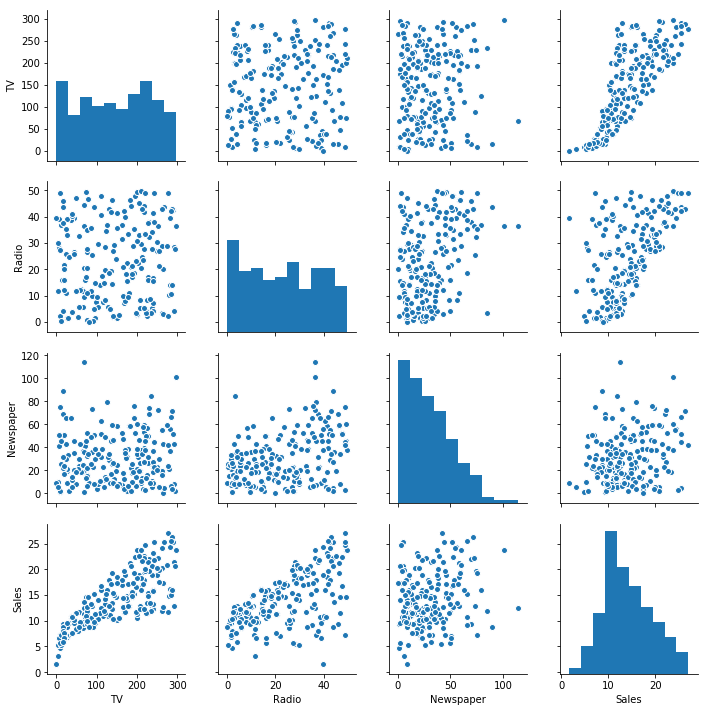

In [4]:
import seaborn as sns
%matplotlib inline

sns.pairplot(adver_data)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = adver_data.iloc[:,[0,1,2]].values
y = adver_data[['Sales']].values

print(X)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
import numpy as np

means, stds = map(lambda i: X[:,[i]].mean(), range(X.shape[1])), map(lambda i: X[:,[i]].std(), range(X.shape[1]))

print means
print stds

M = np.array(means)
print(np.where(M==147.0425)[0])
x = X[:,[2]]
print('x: ', x)
print(np.where(X==x)[1][0])


[147.0425, 23.264000000000006, 30.553999999999995]
[85.63933175679269, 14.809645640595186, 21.724106057557353]
[0]
('x: ', array([[ 69.2],
       [ 45.1],
       [ 69.3],
       [ 58.5],
       [ 58.4],
       [ 75. ],
       [ 23.5],
       [ 11.6],
       [  1. ],
       [ 21.2],
       [ 24.2],
       [  4. ],
       [ 65.9],
       [  7.2],
       [ 46. ],
       [ 52.9],
       [114. ],
       [ 55.8],
       [ 18.3],
       [ 19.1],
       [ 53.4],
       [ 23.5],
       [ 49.6],
       [ 26.2],
       [ 18.3],
       [ 19.5],
       [ 12.6],
       [ 22.9],
       [ 22.9],
       [ 40.8],
       [ 43.2],
       [ 38.6],
       [ 30. ],
       [  0.3],
       [  7.4],
       [  8.5],
       [  5. ],
       [ 45.7],
       [ 35.1],
       [ 32. ],
       [ 31.6],
       [ 38.7],
       [  1.8],
       [ 26.4],
       [ 43.3],
       [ 31.5],
       [ 35.7],
       [ 18.5],
       [ 49.9],
       [ 36.8],
       [ 34.6],
       [  3.6],
       [ 39.6],
       [ 58.7],
       [ 15.9

In [7]:
#X1 = np.array(map(lambda j: (X[:,[j]] - means[j])/stds[j], range(3)))
#X2 = np.apply_along_axis(lambda x: (x - means[np.where(X==x)[1][0]])/stds[np.where(X==x)[1][0]], 0, X)
#X1 = np.array(map(lambda el: (X[:,[means.index(el)]] - el)/stds[means.index(el)], means))
X1 = np.apply_along_axis(lambda matr: np.array([(matr[0] - means[0])/stds[0],\
                                                (matr[1] - means[1])/stds[1],\
                                                 (matr[2] - means[2])/stds[2]]), 1, X)
#X3 = map(lambda xi: (xi - means[np.where(X==xi)[1][0]])/stds[np.where(X==x)[1][0]], X)

In [8]:
print(X1)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [9]:
ones = np.ones((200, 1))
X2 = np.hstack((ones, X1))
print(X2)

[[ 1.00000000e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [ 1.00000000e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [ 1.00000000e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 1.00000000e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 1.00000000e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [ 1.00000000e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [ 1.00000000e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [ 1.00000000e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [ 1.00000000e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 1.00000000e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [ 1.00000000e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 1.00000000e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [ 1.00000000e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [ 1.00000000e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 1.00000000e+00  6.66253447e-01  6.50657027e-01  7.11007392e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [10]:
def mserror(y, y_pred):
    return 1./y.shape[0] * np.sum((y - y_pred)**2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [11]:
y_pred_med = ones * np.median(y)
answer1 = mserror(y, y_pred_med)
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [12]:
def normal_equation(X, y):
    Xt = np.transpose(X)
    return np.linalg.solve(Xt.dot(X), Xt.dot(y))
     #np.linalg.inv  # Ваш код здесь

In [13]:
norm_eq_weights = normal_equation(X2, y)
print(norm_eq_weights)

[[14.0225    ]
 [ 3.91925365]
 [ 2.79206274]
 [-0.02253861]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [14]:
answer2 = (np.array([1, 0, 0, 0])).dot(norm_eq_weights)
print(answer2)
write_answer_to_file(answer2, '2.txt')

[14.0225]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [15]:
def linear_prediction(X, w):
    return X.dot(w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [16]:
answer3 = mserror(y, linear_prediction(X2, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [70]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    #d = w[0] + X[train_ind][1] * w[1] + X[train_ind][2] * w[2] + X[train_ind][3] * w[3] - y
    d = X[train_ind].dot(w) - y[train_ind]
    grad0 = 2./X.shape[0] * d
    grad1 = 2./X.shape[0] * X[train_ind][1] * d
    grad2 = 2./X.shape[0] * X[train_ind][2] * d
    grad3 = 2./X.shape[0] * X[train_ind][3] * d
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [69]:
X2[0].dot(norm_eq_weights) - y[0]

array([-1.57602559])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [71]:
import scipy as sp

def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)  
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        # Ваш код здесь
        iter_num += 1
        print(iter_num)
        #print(w)
        w_new = stochastic_gradient_step(X, y, w, random_ind)
        weight_dist = sp.spatial.distance.euclidean(w, w_new)
        print(weight_dist)
        w = w_new
        errors.append(mserror(y, linear_prediction(X, w)))
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [72]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X2, y, np.array([0]*4).reshape((4,1)), max_iter=1e5)

1
0.00309927214728
2
0.00187034599391
3
0.00381764912983
4
0.00292556131844
5
0.00138860686864
6
0.00154717528222
7
0.00374644318266
8
0.00305734583596
9
0.00309409207967
10
0.00141532714893
11
0.00254944500931
12
0.00350646462555
13
0.00145530148205
14
0.00300957090636
15
0.00193311937393
16
0.00193652470257
17
0.000396750582228
18
0.00164800326222
19
0.00414859262986
20
0.00209022549507
21
0.00350081127313
22
0.00182653865811
23
0.00338084470437
24
0.00166304122205
25
0.00189768366021
26
0.00226637061447
27
0.00305158987778
28
0.00157988343831
29
0.00161506979646
30
0.00240419909078
31
0.0029812830912
32
0.00252052650279
33
0.0052147667826
34
0.00351881409647
35
0.00226407091697
36
0.00291593032063
37
0.00132340611541
38
0.00132288699199
39
0.00235226428872
40
0.00132215101311
41
0.00205018526205
42
0.00172289701154
43
0.00372203358254
44
0.00220298306284
45
0.000389695177954
46
0.00204873857968
47
0.00270389812758
48
0.00304561107553
49
0.0016791697307
50
0.001665899245
51
0.0059654

0.00145028921072
557
0.00222540441395
558
0.00290787235139
559
0.00194291570087
560
0.00284260158148
561
0.00149542157058
562
0.00206207219654
563
0.00163832445666
564
0.00467545447205
565
0.0019251125821
566
0.00286489157798
567
0.00167770921115
568
0.00290283059068
569
0.00170817092484
570
0.00147831884117
571
0.00159607404633
572
0.00197860785676
573
0.00153520015033
574
0.00346074728831
575
0.00174032058987
576
0.00358292803322
577
0.00278714298824
578
0.00345668069074
579
0.00215601252308
580
0.00281386321893
581
0.00392330965252
582
0.00253687767185
583
0.00164695347485
584
0.00153223599864
585
0.00231752547863
586
0.00240033333009
587
0.00290792820842
588
0.00119371704588
589
0.00294944450576
590
0.00286535624861
591
0.00294846571096
592
0.00440576379035
593
0.00221839638672
594
0.00183992083628
595
0.00182327840662
596
0.00319971841129
597
0.00599599536601
598
0.00300597197715
599
0.00246287280886
600
0.0018387816577
601
0.00295513248005
602
0.00127492992724
603
0.0059975387399

0.00251596676323
1051
0.00366216944742
1052
0.00101375911156
1053
0.00252547886808
1054
0.00229326638968
1055
0.00235066605776
1056
0.00132754422332
1057
0.00182284513504
1058
0.00117238956152
1059
0.00384524451452
1060
0.0026667582263
1061
0.00186858016799
1062
0.00183250961773
1063
0.00153139367434
1064
0.00149444910437
1065
0.00223993647955
1066
0.0041693381971
1067
0.00147433834013
1068
0.00488947480103
1069
0.00329341312822
1070
0.00428971469053
1071
0.0020159339001
1072
0.00302137537267
1073
0.00577792013377
1074
0.00141662684687
1075
0.00143343937856
1076
0.0027014118113
1077
0.00149797212911
1078
0.00236160126707
1079
0.0014213241165
1080
0.00285349435284
1081
0.00154597455382
1082
0.00174284161338
1083
0.00213328899632
1084
0.00279418083229
1085
0.00418405468586
1086
0.0016697264778
1087
0.00152161064014
1088
0.00202120723256
1089
0.00194580325973
1090
0.0015206043288
1091
0.00241461060881
1092
0.00271397773218
1093
0.00218223262908
1094
0.00207145366549
1095
0.00150139157173


0.00158989145903
1518
0.00265449963303
1519
0.00524987114725
1520
0.0014078548004
1521
0.00117463700005
1522
0.00117452383192
1523
0.00254973559782
1524
0.00351372529417
1525
0.00143228250144
1526
0.0031329707719
1527
0.00427891172638
1528
0.0054622341712
1529
0.0015472173041
1530
0.00133558032432
1531
0.00166358815266
1532
0.00191858339894
1533
0.00144827451229
1534
0.0013971048025
1535
0.00184541238986
1536
8.30833084825e-05
1537
0.00153289631733
1538
0.00159259781995
1539
0.00219208781414
1540
0.007826752314
1541
0.00156165885276
1542
0.00265723164603
1543
0.00147287016166
1544
0.00194801587503
1545
0.0017263736044
1546
0.0015595075637
1547
0.00209915782473
1548
0.00313018758305
1549
0.00426894552032
1550
0.00149179330712
1551
0.000859756477459
1552
0.00319835796508
1553
0.00141340994085
1554
0.00265444336747
1555
0.0049648203957
1556
0.00147613667506
1557
0.00130228724199
1558
0.00160241145878
1559
0.00202048571824
1560
0.00140264470438
1561
0.00180852444025
1562
0.00198832145141
1

0.00241728931804
2023
0.00114673552418
2024
0.00161702787598
2025
0.00202004302486
2026
0.00154757776235
2027
0.00130273262044
2028
0.00139196616509
2029
0.00145919904389
2030
0.00472308579756
2031
0.00218431283176
2032
0.00471987190072
2033
0.00214398256887
2034
0.00108096267313
2035
0.00158116741517
2036
0.00218198059113
2037
0.00216856675639
2038
0.00258111643215
2039
0.00134623180692
2040
0.00188120982479
2041
0.00242211326578
2042
0.00107838049877
2043
0.00200277802987
2044
0.001076701209
2045
0.00161398854676
2046
0.00186939921947
2047
0.00355157459746
2048
0.00157791686218
2049
0.00254808287132
2050
0.00149405921535
2051
0.0025470782449
2052
0.00150082220406
2053
0.00139901014641
2054
0.00125182140889
2055
0.00109329449141
2056
0.00218906663655
2057
0.00305015929662
2058
0.00243975869408
2059
0.00121958957451
2060
0.00226685653146
2061
0.00329997608727
2062
0.00342693407473
2063
0.00141053091035
2064
0.00116968725113
2065
0.00161470013313
2066
0.00163428569425
2067
0.00186529606

0.00142909436964
2513
0.0016159867127
2514
0.0010932446979
2515
0.00184052314067
2516
0.00148835125875
2517
0.00202882242185
2518
0.00125984366045
2519
0.001689293758
2520
0.00155118203285
2521
0.00371101032053
2522
0.00128889551004
2523
0.0018460027138
2524
0.00226739780515
2525
0.0033445521698
2526
0.00134907168116
2527
0.00142692199589
2528
0.0015224529358
2529
0.00687585734788
2530
0.00175525420734
2531
0.00142028350442
2532
0.001259583234
2533
0.00174343255871
2534
0.00148702034265
2535
0.00132431625195
2536
0.00154908080045
2537
0.00355202058166
2538
0.00232007862635
2539
0.00163081247401
2540
0.00140332212642
2541
0.00338710894718
2542
0.00130503257329
2543
0.00289865635422
2544
0.00337081964835
2545
0.00109548020185
2546
0.0014288534821
2547
0.00151528132414
2548
0.00289740969513
2549
0.0013738546575
2550
0.00242953677016
2551
0.00122279771969
2552
0.00137310857597
2553
0.00367308312421
2554
0.00214744958829
2555
0.00183467524525
2556
0.00137308871839
2557
0.00125644783784
2558

3026
0.00122779702442
3027
0.00108617362868
3028
0.000984231861254
3029
0.00221946382009
3030
0.00152467579531
3031
0.00130476852394
3032
0.00524627676428
3033
0.00110274394205
3034
0.00427376414784
3035
0.00130455105499
3036
0.00188679593743
3037
0.00130382191628
3038
0.00159903603969
3039
0.00177107618303
3040
0.00165519403507
3041
0.00188543310209
3042
0.00124320045698
3043
0.000635862092869
3044
0.00165015040362
3045
0.00111371096592
3046
0.00117078936565
3047
0.00116515146951
3048
0.00174104003286
3049
0.00277411435314
3050
0.0045840432178
3051
0.00124197934495
3052
0.00227311268277
3053
0.00174090935607
3054
0.00124151503865
3055
0.00144157531848
3056
0.00176634604648
3057
0.00189788766659
3058
0.00213440939425
3059
0.0015368361331
3060
0.00266755174243
3061
0.00130624311773
3062
0.00245055309421
3063
0.00139106713252
3064
0.00339321874674
3065
0.001190355757
3066
0.00169424946125
3067
0.00106956327196
3068
0.00188083824036
3069
0.00426381333812
3070
0.00164680545749
3071
0.00173

3562
0.000993730603608
3563
0.00165114922573
3564
0.00111081561616
3565
0.00133974706449
3566
0.00222416661173
3567
0.000994002907928
3568
0.00146724887253
3569
0.00190387305394
3570
0.00168782985106
3571
0.00309086900858
3572
0.000985156143466
3573
0.00193493398383
3574
0.00263038444816
3575
0.00100311962256
3576
0.00453856355486
3577
0.00148401683009
3578
0.0032975168897
3579
0.00160041363233
3580
0.00501673547647
3581
0.0018514631248
3582
0.0042902938346
3583
0.00242538455432
3584
0.00132345764002
3585
0.00250433418825
3586
0.00164569184554
3587
0.00108901182326
3588
0.00179833513099
3589
0.000970495493799
3590
0.00189828034351
3591
0.00351199821818
3592
0.00437782176229
3593
0.00168332562177
3594
0.0017061317376
3595
0.00252422343394
3596
0.00113235832892
3597
0.00285862881435
3598
0.00242024066529
3599
0.00146074128419
3600
0.00409350906294
3601
0.00307486725704
3602
0.0010207757609
3603
0.00341878522801
3604
0.00114600530544
3605
0.00108268707288
3606
0.00239825228603
3607
0.0046

0.00216676133423
4097
0.0012385353184
4098
0.00228466828202
4099
0.00108851941102
4100
0.00129886425474
4101
0.0019609962388
4102
0.00211770417928
4103
0.00222796977413
4104
0.00121927259969
4105
0.00131570542395
4106
0.00156280414706
4107
0.00201614189417
4108
0.000397800591412
4109
0.00106410047546
4110
0.00131512710464
4111
0.00207224944624
4112
0.000974353969884
4113
0.00173219217822
4114
0.00135539598058
4115
0.00157951672964
4116
0.00147225413674
4117
0.00121803623006
4118
0.0013098938126
4119
0.00199518277
4120
0.00142847579123
4121
0.00206242773952
4122
0.00126405510468
4123
0.00126774182818
4124
0.00103281145911
4125
0.00230747111631
4126
0.00157795554237
4127
0.00271616004663
4128
0.00409271909951
4129
0.00148999292806
4130
0.00141498935585
4131
0.00105679936127
4132
0.00312981006337
4133
0.00200996513481
4134
0.00105372181273
4135
0.00206970056421
4136
0.000823568979801
4137
0.00119836501999
4138
0.00304097209871
4139
0.00143943722987
4140
0.000647399097873
4141
0.0015326114

0.00149079650183
4506
0.00457701447719
4507
0.00110322807721
4508
0.00155619773738
4509
0.00191795134123
4510
0.00238274437588
4511
0.000730483191266
4512
0.00147771325177
4513
0.00153387531482
4514
0.000607073017154
4515
0.00278872107973
4516
0.00165807570156
4517
0.00197532617368
4518
0.00138609880145
4519
0.00097033347954
4520
0.00169745124989
4521
0.00127047207597
4522
0.00261000410011
4523
0.00166822647575
4524
0.00260892173377
4525
0.00178467879322
4526
0.000988289116845
4527
0.000397382099719
4528
0.00139899453828
4529
0.000765295449009
4530
0.00185769933851
4531
0.00138615300753
4532
0.00432305013063
4533
0.00202811774492
4534
0.00156431547603
4535
0.00139075240895
4536
0.00134351555604
4537
0.0023758306836
4538
0.00155251215476
4539
0.00225399893994
4540
0.00210207379288
4541
0.00138946394866
4542
0.00138916867171
4543
0.00237145748106
4544
0.00142663887694
4545
0.00244516697935
4546
0.00173945730072
4547
0.00221050635019
4548
0.00139323978527
4549
0.00138411459052
4550
0.0006

0.00113937127429
5055
0.0011911174294
5056
0.000856987391796
5057
0.000936434296262
5058
0.00130957637756
5059
0.00248052739474
5060
0.00172416262923
5061
0.000876727892484
5062
0.000977308953834
5063
0.0011921099401
5064
0.00248330246162
5065
0.00261613861953
5066
0.00191130322151
5067
0.00118189281574
5068
0.00363735555076
5069
0.00345859527321
5070
0.0010399287304
5071
0.00121976346453
5072
0.00111926986175
5073
0.00102541143407
5074
0.000855389483734
5075
0.00194512971303
5076
0.000714198685739
5077
0.00272904330036
5078
0.00174437878831
5079
0.00200086573121
5080
0.00131335379624
5081
0.00146207916583
5082
0.00107576714686
5083
0.000810336549734
5084
0.00105717994357
5085
0.000491356475526
5086
0.0015566407787
5087
0.00148326793913
5088
0.00187333218546
5089
0.00102373310146
5090
0.000349281768803
5091
0.0012147302034
5092
0.00101359708037
5093
0.000910797920388
5094
0.00120315110753
5095
0.00128975610965
5096
0.00121509270691
5097
0.000862940886492
5098
0.00111047768659
5099
0.00

5496
0.00112942434296
5497
0.000834682957778
5498
0.00109456142778
5499
0.00463119007646
5500
0.00420454043224
5501
0.0013928412308
5502
0.0012761601925
5503
0.00194914162823
5504
0.000886736541937
5505
0.001027917919
5506
0.00119017045426
5507
0.00400543276218
5508
0.00224077751047
5509
0.000343202205906
5510
0.00116345697825
5511
0.00115022206642
5512
0.000860489657007
5513
0.00238112328871
5514
0.00099633324183
5515
0.00140666350559
5516
0.00252685719558
5517
0.00223917984448
5518
0.00186310366156
5519
0.00201282179928
5520
0.00236676365385
5521
0.00138835491119
5522
0.00127072204386
5523
0.0033048346536
5524
0.00171428177254
5525
0.00147711015813
5526
0.00104594813128
5527
0.00107216905487
5528
0.00095735813729
5529
0.00140980290588
5530
0.00114788441354
5531
0.000983166030341
5532
0.00219761932793
5533
0.000994464906418
5534
0.000978103252242
5535
0.00499552112854
5536
0.00259712845689
5537
0.000819274528211
5538
0.00137846831522
5539
0.00168334977192
5540
0.00147698723779
5541
0.

0.00170726554504
6033
0.00104056848
6034
0.00127959543372
6035
0.000976325882275
6036
0.000931559901081
6037
0.00097613956858
6038
0.00139518719216
6039
0.00348503833407
6040
0.00162048695111
6041
0.000975658885568
6042
0.00078148244403
6043
0.000623450760375
6044
0.00398721054873
6045
0.00105743786485
6046
0.00108712052951
6047
0.00112254177718
6048
0.00119576848028
6049
0.00252586615013
6050
0.000901281803576
6051
0.00133612656209
6052
0.000858326489696
6053
0.0009423188811
6054
0.00172670120805
6055
0.00353739299019
6056
0.000795627126916
6057
0.00183747438117
6058
0.00111615117124
6059
0.0013451125953
6060
0.000941624761847
6061
0.00139635627172
6062
0.00249816850575
6063
0.00123237769422
6064
0.00225252261068
6065
0.00124574599796
6066
0.00205730934802
6067
0.00104758891481
6068
0.00103855553811
6069
0.000811995205886
6070
0.00121199908136
6071
0.000844896110962
6072
0.00190194575733
6073
0.00131104825013
6074
0.0014062402043
6075
0.00240387874923
6076
0.00236012005575
6077
0.0008

6554
0.0036680116432
6555
0.000885396448938
6556
0.00230460989447
6557
0.00152308434296
6558
0.00130647601093
6559
0.00233137256506
6560
0.00107276716509
6561
0.00157090165129
6562
0.00215142944682
6563
0.000988128698693
6564
0.00083266766201
6565
0.00074516694145
6566
0.00122536214586
6567
0.00092694372128
6568
0.00123832018343
6569
0.00107744491505
6570
0.000886148397428
6571
0.000906062004369
6572
0.000770270135233
6573
0.000618286581727
6574
0.00193424703613
6575
0.000994814307792
6576
0.00441694485074
6577
0.000799957785462
6578
0.000908376330741
6579
0.00107027665252
6580
0.0010700006552
6581
0.00122430784379
6582
0.00139581640728
6583
0.00144689711633
6584
0.00128944387542
6585
0.00120374880954
6586
0.00116661411693
6587
0.000883015920865
6588
0.00144600775456
6589
0.00261294412046
6590
0.00129980320253
6591
0.00129928602641
6592
0.00113410271967
6593
0.00179638852433
6594
0.00146607980665
6595
0.00103658285549
6596
0.00141338483995
6597
0.00260918792735
6598
0.00112957565798
65

0.000691546567042
7037
0.000894577206134
7038
0.00165150711422
7039
0.00140571845868
7040
0.000910037365968
7041
0.00101662352874
7042
0.00089058633669
7043
0.00151240115676
7044
0.00104513502456
7045
0.000866458836644
7046
0.00368274072369
7047
0.00124570160744
7048
0.00122432368796
7049
0.00156717893535
7050
0.00122400843414
7051
0.000939467366143
7052
0.000848254965221
7053
0.000192826750718
7054
0.00214423931005
7055
0.0014336517869
7056
0.00171836258741
7057
0.00189039851832
7058
0.00206602330208
7059
0.000689292346328
7060
0.0010945944475
7061
0.00174526153828
7062
0.000956224786252
7063
0.00320757849569
7064
0.000875087525304
7065
0.000743127571718
7066
0.00110532209236
7067
0.00082446080551
7068
0.00117590551231
7069
0.00140756412444
7070
0.00222096770572
7071
0.000970189652028
7072
0.000859086664418
7073
0.000991579923153
7074
0.00156284943803
7075
0.00129083198317
7076
0.00150905995751
7077
0.00156206042417
7078
0.000761944837998
7079
0.00129035632973
7080
0.00225977527562
70

7542
0.000844644057387
7543
0.00128783158116
7544
0.00118354840427
7545
0.00213549474033
7546
0.00341107825498
7547
0.00121270195694
7548
0.00196554998395
7549
0.00117540707188
7550
0.00109790628547
7551
0.00151419973411
7552
0.000795155017551
7553
0.00340669768351
7554
0.00134787178025
7555
0.00106767374791
7556
0.00246836854374
7557
0.000962530686829
7558
0.00110111077552
7559
0.00230638194388
7560
0.000957900132624
7561
0.000865080460887
7562
0.000921959018365
7563
0.00151229191305
7564
0.00138771177465
7565
0.000893682492186
7566
0.00114074503727
7567
0.000847856601417
7568
0.00165055489431
7569
0.000946636265497
7570
0.000915003274399
7571
0.000369173425695
7572
0.00095743446216
7573
0.000841990981466
7574
0.00106614139135
7575
0.00115309595942
7576
0.00100445403631
7577
0.000241897042453
7578
0.0009880597773
7579
0.000720330803994
7580
0.00113058184235
7581
0.000966565870018
7582
0.00246451686558
7583
0.0011523211412
7584
0.0012067719085
7585
0.00115149499754
7586
0.0007183107160

8059
0.00172303990367
8060
0.00127911708889
8061
0.00107280998098
8062
0.000972643937756
8063
0.0010847498147
8064
0.00253468522285
8065
0.000894239571913
8066
0.00224427884349
8067
0.000334634254707
8068
0.00220255129408
8069
0.0014479732206
8070
0.00232050850549
8071
0.000938953385158
8072
0.0016879332833
8073
0.00202409971181
8074
0.00106235037177
8075
0.00271103305227
8076
0.000110904791057
8077
0.00187617475144
8078
0.000934194054979
8079
0.00136681822141
8080
0.000845416433209
8081
0.000808240124192
8082
0.000655611497192
8083
0.000743461062922
8084
0.00134400006381
8085
0.000499420542139
8086
0.00152398662154
8087
0.00089488465414
8088
0.000899095375747
8089
0.00223752165458
8090
0.000315438191631
8091
0.000867752852513
8092
0.000972871035151
8093
0.000185740327994
8094
0.000798744009319
8095
0.00105822613077
8096
0.000659029710543
8097
7.72483444592e-05
8098
0.000881888973145
8099
0.000787732859404
8100
0.0014650567173
8101
0.00235300882387
8102
0.00114439488384
8103
0.00090250

0.000724496485368
8567
0.00104990125483
8568
0.000255378173409
8569
0.00153987809919
8570
0.00322383851062
8571
0.000731633766268
8572
0.00084750991188
8573
0.000610145695977
8574
0.000541078645981
8575
0.00115333126268
8576
0.00159666855134
8577
0.001860061556
8578
0.00140222211333
8579
0.00142009462718
8580
0.0011282843691
8581
0.00134052868556
8582
0.0014580628889
8583
0.000770359813943
8584
0.0012097361094
8585
0.000883224678476
8586
0.00159362029726
8587
0.000907686159531
8588
0.000836146319175
8589
0.000434017703326
8590
0.00103031344325
8591
0.000667960719035
8592
0.000846221432926
8593
0.00321734249746
8594
0.00210286932782
8595
0.00120868678448
8596
0.00273427697088
8597
0.000938873398312
8598
0.00164164489944
8599
0.00102994898364
8600
0.000648287264281
8601
0.000884040631909
8602
0.000932123042165
8603
0.00105217721169
8604
0.000282542934544
8605
0.00141089967369
8606
0.00147972669913
8607
0.0027936654353
8608
0.000739753948025
8609
0.000609483982312
8610
0.00103387553734
86

9100
0.00104509719578
9101
0.00328074283216
9102
0.00064828663439
9103
0.00180007522861
9104
0.0020571842062
9105
0.000723323395043
9106
0.000720461549648
9107
0.00170130021329
9108
4.59111426016e-05
9109
0.00106116074502
9110
0.00146845289583
9111
0.000976290428128
9112
0.00103063383287
9113
0.00109475277018
9114
0.0029954860662
9115
0.000883002010568
9116
0.000733057784953
9117
0.000762571332047
9118
0.000306297174178
9119
0.00123193805702
9120
0.00137981541972
9121
0.000185637053447
9122
0.000545653872129
9123
0.000717152174923
9124
0.00059651344775
9125
0.000940547698357
9126
0.000766049067078
9127
0.00101269600759
9128
0.000725344641253
9129
0.00100685333794
9130
0.00119987988898
9131
0.0010153797209
9132
0.00104127571
9133
0.00072531854552
9134
0.000716321805866
9135
0.0012401213151
9136
0.000811978605647
9137
0.002393623286
9138
0.000351422567356
9139
0.000835577902898
9140
0.000990707729225
9141
0.000855317171702
9142
0.000532764249799
9143
0.000901247558467
9144
0.000730493645

0.00107334536097
9677
0.00164609926235
9678
0.000731098168266
9679
0.00112089512136
9680
0.00200655965895
9681
0.00100940547002
9682
0.000817298509237
9683
0.000917663260338
9684
0.000768521706711
9685
0.000721712027288
9686
0.000897826525477
9687
0.000867246460906
9688
0.00130864320666
9689
0.00143651240152
9690
0.000803784281124
9691
0.000878254715009
9692
0.000848227196802
9693
0.000786378788418
9694
0.00104894744218
9695
0.000678567878114
9696
0.000538853142843
9697
0.000815207448921
9698
0.00196811059911
9699
0.000945429038516
9700
0.000908876880939
9701
0.00087681541463
9702
0.00067250834438
9703
0.00189595068505
9704
0.000840697932966
9705
0.000446565811376
9706
0.000965821121448
9707
0.00202573503333
9708
0.00112613403038
9709
0.00127551395043
9710
0.00107745599351
9711
0.000506397762067
9712
0.00121605503477
9713
0.000894868945675
9714
0.00109479791458
9715
0.000671434562755
9716
0.000703297233592
9717
0.000102652275242
9718
0.00171986904274
9719
0.000675672756747
9720
0.00071

0.000637203461156
10264
0.00103362214336
10265
0.000636895953067
10266
0.00075717215595
10267
0.00171186437869
10268
0.000767144096465
10269
0.000910647908482
10270
0.00188048039626
10271
0.00169100826428
10272
0.00100930515958
10273
2.59216144607e-05
10274
0.000888407798272
10275
0.000965281803041
10276
0.000981063156589
10277
0.000666775402829
10278
0.00267314824627
10279
0.000890643041942
10280
0.000120177688183
10281
0.000670936812046
10282
0.000982397733924
10283
0.000526824439539
10284
0.00220921343359
10285
0.000502035519361
10286
0.000981015977677
10287
0.000591114179345
10288
0.000670380308905
10289
0.000968868186898
10290
0.00047890560729
10291
0.000860706267204
10292
0.000669454207609
10293
0.00100644712451
10294
0.0012513526031
10295
0.00151125675972
10296
0.000641820550614
10297
0.00084426519832
10298
0.00153086783947
10299
0.00128670990297
10300
0.00127912680446
10301
0.00111989979398
10302
0.00168852604026
10303
0.000641521237345
10304
0.000944262486756
10305
0.000888795

0.000536652455228
10812
0.000750654665634
10813
0.00201814329582
10814
0.000684511111647
10815
0.00144972706422
10816
0.00162542915697
10817
0.000880534368719
10818
0.000536077931861
10819
0.000638710444639
10820
0.00030127259499
10821
6.23819829629e-05
10822
0.000853307913693
10823
0.00155879629475
10824
0.000665097847778
10825
0.000694225409325
10826
0.000830404008063
10827
0.000469346056172
10828
0.00226176349485
10829
0.000683987844077
10830
0.00144284848504
10831
0.000555922734864
10832
0.00087996001573
10833
0.000825822328343
10834
0.000952693857818
10835
0.00183119348106
10836
0.000449100976249
10837
0.000618962105327
10838
0.000603604239757
10839
0.00162240546091
10840
0.000878983268102
10841
0.000920517536387
10842
0.00118806726441
10843
0.000994188315872
10844
0.00208030479212
10845
0.000617453293802
10846
0.000824992736116
10847
0.00068955098911
10848
0.00120315250193
10849
0.00170428303518
10850
0.00140917212343
10851
0.000616662762042
10852
0.000678977984781
10853
0.000828

11347
0.000717577483275
11348
0.00128713815647
11349
0.000685534367116
11350
0.000894137105718
11351
0.000869528442529
11352
0.000953621361625
11353
0.000712016729663
11354
0.00111509866422
11355
9.13124567321e-05
11356
0.000883437605104
11357
0.000805587133019
11358
0.000679844639674
11359
3.88253803568e-05
11360
0.00138919284497
11361
0.000341042539451
11362
0.0005319497971
11363
0.000827967625468
11364
0.000717483479972
11365
0.00107003183992
11366
0.000831210933403
11367
0.000943470236203
11368
0.000632065703287
11369
0.000394761956014
11370
0.00122513027599
11371
0.000920792177089
11372
0.000483821574189
11373
0.00199386336031
11374
0.00159140360026
11375
0.00052098506027
11376
0.00114361111338
11377
0.000618670998017
11378
0.000826974859637
11379
0.000415930711172
11380
0.000394482536773
11381
0.000660567800532
11382
0.0013409070889
11383
3.23604308275e-05
11384
0.00107135888864
11385
0.00122457067532
11386
0.00111284751012
11387
0.000799990360895
11388
0.000793396295985
11389
0.

11854
0.000326014374298
11855
0.000688854290889
11856
0.000567449466982
11857
0.00148071481487
11858
0.000811853490616
11859
0.000792064058489
11860
0.000908475414565
11861
0.000933954677361
11862
0.00174847372855
11863
0.000710067272161
11864
0.00126438210851
11865
0.000637779085143
11866
0.000449312354279
11867
0.000382869332682
11868
0.000972396208917
11869
0.0025971849509
11870
0.000873772249552
11871
0.000717937095587
11872
0.000790515932902
11873
0.000652165323457
11874
0.000778486111913
11875
0.000501648453845
11876
0.00117162703972
11877
0.000783363758073
11878
0.00103662188198
11879
0.00132572075842
11880
0.00207526498529
11881
0.00242994360479
11882
0.000767549839111
11883
0.000797577905496
11884
0.00127097392428
11885
0.00077912973996
11886
0.00133084190018
11887
0.00104786995024
11888
0.000701888624458
11889
0.000998006530384
11890
0.000621816213366
11891
0.000463499941162
11892
0.000119681209452
11893
0.000257963424438
11894
0.000748030051262
11895
0.000781008094634
11896


0.000977921417411
12406
0.000618278642105
12407
0.000498832742091
12408
0.00125783583605
12409
0.00228747730367
12410
0.000431676036356
12411
0.000956426886488
12412
0.000793776041125
12413
0.000880823555247
12414
0.0005169875348
12415
0.000661671425674
12416
0.000405316421448
12417
0.000533310040818
12418
0.00111680759229
12419
0.000886831627958
12420
0.000292687711109
12421
0.000507854423444
12422
0.00058976848729
12423
0.00102839483677
12424
0.000947346454452
12425
0.000647265775482
12426
0.00073528678679
12427
0.000896752452981
12428
0.000629683261462
12429
0.00248441662111
12430
0.000786613906863
12431
0.000479093742224
12432
0.00106107709692
12433
0.000863398022
12434
0.00166142209467
12435
0.00043592354609
12436
0.00166025850419
12437
0.000474869242024
12438
0.0007546047583
12439
0.000817198811094
12440
0.000226909977456
12441
0.000609607682066
12442
0.00047586730649
12443
0.00102443031091
12444
0.00226879257248
12445
0.000729371229685
12446
0.0016408444512
12447
0.0006904492171

0.000589124423287
12976
9.69913359265e-05
12977
0.00172732750491
12978
0.000515757968079
12979
0.00157632967661
12980
0.00226724006517
12981
9.74954811834e-05
12982
0.000716328810208
12983
0.000548519224228
12984
0.000581107082758
12985
9.16827129676e-05
12986
0.00198088737206
12987
0.000224904054873
12988
0.00154753661988
12989
0.000692984708253
12990
0.000518264525201
12991
0.000363738864315
12992
0.000185276358682
12993
0.000608071746109
12994
0.00210521508475
12995
0.000797961094262
12996
0.000964150535175
12997
0.000305254803087
12998
0.000814936282647
12999
0.00226080005546
13000
0.000581257585244
13001
0.00235619066167
13002
0.000665649423264
13003
0.000616580295475
13004
0.000393855480301
13005
0.000617543935792
13006
0.000538057101767
13007
0.000456460313692
13008
0.000732703976606
13009
0.000389937536039
13010
0.000635484762561
13011
0.000640734410247
13012
0.000863275072647
13013
0.000676800470747
13014
0.000455102707652
13015
0.00116661365042
13016
0.000853328662128
13017
0

13485
0.000706587567855
13486
0.000562766317258
13487
0.00071850549923
13488
0.000504073752302
13489
0.00101619490177
13490
0.000931794854008
13491
0.00136449655658
13492
0.00011992551591
13493
0.000607690009382
13494
0.000125827258392
13495
0.000119596034619
13496
8.40620740123e-05
13497
0.000526660741094
13498
0.00025975106852
13499
0.000559063357441
13500
0.000750677224379
13501
0.000505441178782
13502
0.000868702226027
13503
0.000351065435726
13504
0.00125656392194
13505
0.00226235509243
13506
0.000558450268564
13507
0.00190503320082
13508
0.0012553926554
13509
0.000589685551963
13510
0.000562209248871
13511
0.00132026291527
13512
0.000606869126234
13513
0.00224672500903
13514
0.000216672969509
13515
0.000493756227668
13516
0.000464994248664
13517
0.000468277881835
13518
0.000558514188064
13519
0.00151600469366
13520
0.000844582846458
13521
0.000587671382631
13522
0.000753727304975
13523
0.000777066808802
13524
0.000533902867201
13525
0.00224298771271
13526
0.000890246829119
13527


13886
0.000385146958884
13887
0.0004809837108
13888
0.000234330845742
13889
0.00212258373766
13890
0.000918505639843
13891
0.000608230917098
13892
0.000157000647184
13893
0.000699358462768
13894
0.000488868880566
13895
0.000693976207654
13896
0.000817384466909
13897
0.000433522426126
13898
0.000368558610667
13899
0.000419692137418
13900
0.000863900537175
13901
0.000682711040306
13902
0.000604089833212
13903
0.00047982671327
13904
0.000511292959196
13905
0.001438308094
13906
0.00195823097
13907
8.32637196697e-05
13908
0.000368161807808
13909
0.000994757279178
13910
0.000368082510664
13911
0.000662392116587
13912
0.00113181847665
13913
0.000486689914056
13914
0.000543528892319
13915
0.000176109772454
13916
0.00050646061028
13917
0.00106001204814
13918
0.00070058886732
13919
0.000541706400867
13920
0.000674271015495
13921
0.000443991345903
13922
0.000838101068291
13923
0.000458869575141
13924
0.000290179431107
13925
0.000615649657898
13926
2.20671963314e-06
13927
0.000653086029003
13928
0

14419
0.000295066882818
14420
0.0015119590578
14421
0.000294514734316
14422
0.000610203451812
14423
0.000121073502991
14424
0.000836360229643
14425
0.000608464088101
14426
0.000826594866068
14427
0.00140239963072
14428
0.000717340416262
14429
0.000556789532644
14430
0.000931703228152
14431
0.00043734668624
14432
0.00049561882807
14433
0.000204081984222
14434
0.000472156807567
14435
0.000526748293459
14436
0.000536779386218
14437
0.000752683403235
14438
0.000618165671209
14439
0.00141205488516
14440
0.0015085769747
14441
0.000495139712641
14442
0.0020353818964
14443
0.000688210978718
14444
0.000484352571957
14445
0.000521029054741
14446
0.000600673927106
14447
0.000800633894798
14448
0.00186789788726
14449
3.38466344861e-05
14450
0.00106589067912
14451
0.00106826729454
14452
0.00143723378355
14453
0.000706998572091
14454
0.00105249950886
14455
0.000580880496206
14456
0.000688423723332
14457
0.000536553097735
14458
0.000567027417083
14459
0.000583308069504
14460
0.000268580298343
14461
0

0.00128700115044
15016
0.000423314416398
15017
0.000710916883309
15018
0.000673307261131
15019
0.000739352921388
15020
0.000665793871857
15021
0.000350561583372
15022
0.000527925161939
15023
0.000484871783848
15024
0.000674659040845
15025
0.000546068120538
15026
0.00202482114577
15027
0.000590122575657
15028
0.000859090598601
15029
0.000122840633502
15030
0.000820360260581
15031
0.000384785620143
15032
0.00131969088937
15033
0.000441396163829
15034
0.00108433715033
15035
0.000626711952551
15036
0.000218633316042
15037
0.000477083251117
15038
0.000174347724716
15039
0.00132418152094
15040
0.0014252931818
15041
0.00101957315987
15042
0.000705463413436
15043
0.000661274930838
15044
0.000455959160701
15045
0.000516387289511
15046
0.00143460312259
15047
0.000433397482288
15048
0.000775485874709
15049
0.000719682653716
15050
0.000507341584771
15051
0.000660588484871
15052
0.000207496686016
15053
0.000567271172586
15054
0.000943792339484
15055
0.000621041418913
15056
0.000503123038778
15057
0

0.000234361347019
15601
0.000488082295438
15602
0.000405667623871
15603
0.00128805754367
15604
0.000735786737407
15605
0.000333440514071
15606
0.00192098066462
15607
0.000360911219622
15608
0.000371873416096
15609
5.65672506535e-05
15610
0.00163077087846
15611
0.000259714675241
15612
0.00160682470193
15613
0.00113188448675
15614
0.000638216688923
15615
0.000208955534761
15616
0.000677912091429
15617
0.000400789039834
15618
0.000496669655376
15619
0.000550104598672
15620
0.000237141702287
15621
0.0012207697901
15622
0.000703451546952
15623
0.000192577635928
15624
0.000525249237261
15625
4.85142358543e-05
15626
0.000439872510692
15627
0.0010357000773
15628
0.000821461660953
15629
0.000262045496688
15630
0.000547686027478
15631
8.80359347766e-05
15632
0.000385705785775
15633
0.000275032231158
15634
0.000607291715466
15635
0.000432404777835
15636
0.000732665351744
15637
9.8711637846e-05
15638
0.00077915458599
15639
0.000554856066644
15640
0.000668451971901
15641
0.000483996730791
15642
0.0

16124
0.000386701552901
16125
0.00117741529938
16126
0.000414072317867
16127
0.00041118119083
16128
0.000702164105037
16129
0.00123465163215
16130
0.000112436264496
16131
0.00100195661408
16132
0.000530236552616
16133
0.000373307238717
16134
8.49758641569e-05
16135
0.000347623165326
16136
0.000233657753804
16137
0.00033170261644
16138
0.00122860686301
16139
0.000803017287125
16140
0.000395475159388
16141
0.000288370835807
16142
0.000637750253162
16143
0.000386199327179
16144
8.51880245137e-05
16145
0.000527977887722
16146
0.000784664706589
16147
0.000328947753514
16148
0.000477884519417
16149
0.000710457704104
16150
0.00115515916765
16151
2.28692384221e-06
16152
0.000379546082293
16153
0.00109929088151
16154
0.000449054400099
16155
0.000552845324672
16156
0.00026788881653
16157
0.000640533422455
16158
0.000552745028731
16159
0.000783555621666
16160
0.000718725384309
16161
0.00110666833816
16162
0.00109613367947
16163
0.00145135268527
16164
0.000127891711421
16165
0.0004215328816
16166


0.000688103600111
16684
0.00150908260216
16685
0.000384884921688
16686
0.000120625301688
16687
3.52636963164e-06
16688
0.00117685881018
16689
0.000682729701889
16690
4.01422318175e-05
16691
0.000840451865934
16692
0.000789285981896
16693
0.000959380988011
16694
0.000155360988733
16695
0.00050546185129
16696
0.000758492186117
16697
0.000472048508244
16698
0.000769498270872
16699
0.000493139529345
16700
0.000900773007339
16701
0.000726877281014
16702
0.000464564993077
16703
0.00117867885706
16704
0.000285565224258
16705
0.000410155337589
16706
0.000512476708266
16707
5.21175664659e-05
16708
0.000344078986812
16709
0.000437889187355
16710
3.83142015315e-05
16711
0.000111783046148
16712
0.000392264624393
16713
0.000686407013145
16714
0.000234228122411
16715
0.000601803844485
16716
0.000247124446715
16717
0.00132416649915
16718
0.000674902691757
16719
0.000345842151745
16720
0.000111884840935
16721
0.000148466406193
16722
0.000447827489192
16723
0.000399047922883
16724
5.7993126971e-06
1672

0.000436014882329
17174
0.000469336539967
17175
0.000680693875767
17176
0.000506727939521
17177
0.0007413752436
17178
0.000528586419526
17179
0.000453922934697
17180
0.000321334962137
17181
3.85975655486e-05
17182
0.000638753575275
17183
0.000468806360863
17184
0.00071485732201
17185
0.00078300121405
17186
0.000362271035777
17187
0.000172834860665
17188
0.000483030133712
17189
0.000782495357017
17190
0.000482933050993
17191
0.000468423500998
17192
0.000782110689401
17193
0.00178319715438
17194
0.000408196730182
17195
0.000668034151258
17196
0.000368287055313
17197
0.000825272134839
17198
0.000324015963183
17199
0.00103039427751
17200
0.00121012221211
17201
0.000763859830124
17202
0.000154553178112
17203
0.000361518230058
17204
0.00102979427906
17205
0.000564183764146
17206
0.000467168168283
17207
0.0012064475843
17208
0.000290364857646
17209
0.00114956562684
17210
0.000231149168289
17211
0.000288044533133
17212
0.000612985951151
17213
0.00031815462531
17214
0.000434498981939
17215
0.00

0.000465811625999
17599
0.000542777734732
17600
0.000173695932484
17601
0.00163710404591
17602
0.00025851192818
17603
0.000218898809983
17604
0.000225754010027
17605
0.00045077093711
17606
0.000438945824718
17607
0.00017330199655
17608
0.000213679946766
17609
0.000445389653139
17610
3.11681409256e-05
17611
0.000536095403843
17612
0.000401776483855
17613
0.00125193192084
17614
0.000184124001719
17615
0.000232475375082
17616
0.000669643669209
17617
0.00112066271825
17618
0.000297432883557
17619
0.000232098646399
17620
0.000178533340744
17621
0.00129298283501
17622
0.000480768496515
17623
0.000141219108498
17624
0.000128215464047
17625
0.000275377464803
17626
5.18362500768e-05
17627
0.000605735203388
17628
0.000652652493481
17629
0.000470586613689
17630
0.000480393583448
17631
0.000394714894445
17632
0.000172655729996
17633
0.000717055160257
17634
0.000137683886994
17635
5.07156665562e-05
17636
0.000814401084351
17637
0.000517681877398
17638
1.04432458157e-05
17639
0.000813747044249
17640

0.00106320958922
18083
0.000646591047085
18084
0.000293663092844
18085
0.000437490729444
18086
0.000466512155247
18087
2.2355053172e-05
18088
0.000346487526425
18089
0.000432190314354
18090
0.00161430530842
18091
0.000516545468737
18092
0.00158299514228
18093
0.000139345731529
18094
0.000282343571699
18095
3.49009471393e-05
18096
0.000336771597494
18097
0.00091476561848
18098
0.000472037978358
18099
0.000286782634729
18100
0.00047661474797
18101
0.000364117250283
18102
0.00068507336874
18103
0.000558444962447
18104
0.000166604710025
18105
0.000249590547519
18106
0.000636882797408
18107
0.000209566067227
18108
0.000517891385935
18109
0.000285873813919
18110
0.000439635583457
18111
0.00108401153017
18112
0.000605588114282
18113
0.00168484340264
18114
0.00026918741411
18115
0.000205593667905
18116
0.000444771472511
18117
0.000186798511534
18118
0.000365123064953
18119
0.000746589723492
18120
0.00128058073638
18121
0.000210452364801
18122
0.00052036919937
18123
2.85913609594e-05
18124
0.00

0.000720789308916
18598
0.000289353883902
18599
0.000493041192062
18600
0.001191016037
18601
0.000506232322128
18602
0.000386812863992
18603
0.000241500100282
18604
7.56081433985e-05
18605
0.000792200446632
18606
0.000754648604461
18607
8.16791309574e-05
18608
0.000260707764147
18609
0.000149315748697
18610
1.04327426705e-05
18611
0.000344216665727
18612
5.60016143548e-05
18613
7.04587053692e-05
18614
0.000228592162266
18615
0.000185030755902
18616
0.000496169315034
18617
0.000880677779739
18618
0.00107999579367
18619
0.000188039519126
18620
0.000526694760787
18621
0.00013505094578
18622
0.00101693147141
18623
0.000933740934263
18624
0.0004298902667
18625
0.000260375742598
18626
0.000513301060168
18627
0.000260721720079
18628
0.000260262119328
18629
0.00133245348421
18630
0.000462231381314
18631
0.000574414209345
18632
0.000655059583501
18633
4.74325993816e-05
18634
0.000426644309243
18635
0.000314893155159
18636
0.000212548864741
18637
0.000387849931112
18638
0.000474517037326
18639
0

0.000233437295588
19092
0.000905835854059
19093
0.00131871924887
19094
0.000443075720075
19095
0.000327301607641
19096
4.18673926753e-06
19097
0.000350719354455
19098
0.000564751995516
19099
5.16406998628e-05
19100
0.00168289242525
19101
0.000481860494828
19102
0.000254518532585
19103
0.000207815663308
19104
0.000693488237552
19105
0.000641607337339
19106
8.57708201565e-05
19107
0.000992300833132
19108
0.000219654185517
19109
0.000293714580965
19110
0.000176886888111
19111
0.000293583793274
19112
3.05961599691e-05
19113
0.00129969340593
19114
0.000221928896433
19115
0.000177301331001
19116
0.000997205576698
19117
0.000782583829116
19118
0.00112894246036
19119
0.00073402640089
19120
0.00025396929369
19121
0.000629034601903
19122
0.00057534940094
19123
0.000575152708982
19124
0.00159410351525
19125
4.73279825659e-05
19126
0.000628530928464
19127
0.000203740053848
19128
0.000741885804477
19129
0.000332498267504
19130
0.000356547220385
19131
0.000312905203637
19132
0.00149703465168
19133
9

3.67973719815e-05
19597
0.000587084318115
19598
0.000133471535665
19599
0.000528670699374
19600
0.000165142289406
19601
2.53541310275e-05
19602
0.000453259066398
19603
0.000424247890747
19604
0.000463056941314
19605
0.000392946440304
19606
0.000299339839947
19607
0.000449780983184
19608
0.00048688346689
19609
0.000168947720134
19610
0.000274241926139
19611
0.000548381362951
19612
0.000648381153399
19613
0.000292642910463
19614
0.000267355204381
19615
0.000600271488419
19616
0.000462478933861
19617
0.00126579636559
19618
0.000318913210023
19619
0.00037330650297
19620
0.0012650833224
19621
0.000547813999579
19622
0.000298884524363
19623
0.00040874898112
19624
0.000391242376144
19625
0.000249289508339
19626
0.000391162472692
19627
0.000878328387298
19628
0.000671146464121
19629
0.000376461543856
19630
4.10824346871e-05
19631
0.000400464908115
19632
0.000318777774067
19633
0.00069735646072
19634
0.000509969751557
19635
0.00014102768566
19636
6.86431484845e-05
19637
3.53333501309e-05
19638


20096
0.000387999261825
20097
0.000322375436428
20098
0.00124377151705
20099
0.000209794781005
20100
0.00172146308008
20101
0.000290263559405
20102
0.00048589114914
20103
0.000224266050287
20104
5.26591545988e-05
20105
0.000239748186896
20106
0.000149477728441
20107
0.000966051967943
20108
0.00142569471295
20109
1.80090460583e-05
20110
0.000361868486922
20111
0.00100959047907
20112
1.25066879293e-05
20113
0.000825358263808
20114
0.000322306203628
20115
0.00100714709541
20116
0.000224483221892
20117
0.000277149185458
20118
0.000118447048768
20119
0.00031252686878
20120
0.000334532133602
20121
0.000516983408098
20122
0.00059756594753
20123
3.34314111035e-05
20124
0.00141720409264
20125
0.000603886724754
20126
0.000427809682824
20127
0.000449691964059
20128
0.000180164298227
20129
0.000265389192172
20130
0.000577583667917
20131
6.1210835089e-05
20132
0.00136792907626
20133
1.34201848076e-05
20134
0.000517963730542
20135
0.000822955954358
20136
7.06587925826e-05
20137
0.000338093852366
201

0.000712333193587
20596
0.000424444699105
20597
0.000555713897493
20598
0.000443091923262
20599
0.000447526153709
20600
0.00173794052977
20601
0.000160410758952
20602
0.000555832561346
20603
0.00135812578533
20604
0.000485255868567
20605
0.000125727665502
20606
0.000619378511372
20607
0.000398999814349
20608
0.000484633163168
20609
0.00011438891937
20610
1.92488960728e-05
20611
0.00102837219975
20612
0.000494310524765
20613
0.000166294647446
20614
0.000356339987048
20615
8.07957510721e-05
20616
0.00102727032477
20617
0.000623019875787
20618
0.000431952696336
20619
7.08505210486e-06
20620
0.000417425686023
20621
0.000274242756353
20622
0.000392839161347
20623
0.000567459950802
20624
0.000422722685632
20625
0.000422550569136
20626
0.000421117329239
20627
7.56372316053e-05
20628
0.000909662925886
20629
2.03624967492e-05
20630
0.00031392174425
20631
0.000456531330284
20632
0.000385582336448
20633
0.00021618765978
20634
0.000446609000044
20635
0.000462711757407
20636
0.000412574250604
20637

21095
0.000164871215534
21096
0.000206537891768
21097
0.000452192812159
21098
0.000275782787416
21099
0.000453329574405
21100
0.000710955304416
21101
4.70289952571e-05
21102
0.000119746016161
21103
0.000275528380673
21104
0.000578676918344
21105
0.000191227887765
21106
0.000101033136786
21107
0.000506103985018
21108
9.95594745436e-05
21109
0.000277184571675
21110
0.000275342290879
21111
0.000238908037738
21112
0.000298472950848
21113
5.86626723011e-06
21114
0.000224998134649
21115
0.000682217696684
21116
0.000238820233415
21117
0.000275708147739
21118
0.000293914079713
21119
0.00034201194452
21120
0.000298052558257
21121
0.000216484994557
21122
4.77531445565e-05
21123
0.000135617374503
21124
0.000638266204977
21125
0.000411478446252
21126
0.000317073617222
21127
0.000469238681429
21128
0.000457874601023
21129
0.000295358046756
21130
9.88567876057e-05
21131
0.000216332067533
21132
0.000156443819347
21133
0.000261608326695
21134
0.000209399457869
21135
0.000708980943031
21136
0.000887875

0.000267509548375
21595
0.000197279308158
21596
0.000541407515337
21597
0.000448615834119
21598
0.000140919346845
21599
0.000334260237453
21600
0.000345858611631
21601
0.000241054454928
21602
0.000593593841352
21603
0.000831126800911
21604
0.000487819446567
21605
0.000225020723029
21606
0.000392852135016
21607
0.000119846670609
21608
0.000315667994347
21609
0.00139266878732
21610
1.30921922877e-05
21611
0.000415776831815
21612
0.000277711083815
21613
0.000381241764358
21614
0.000456938566756
21615
0.000198177361935
21616
0.000300121046888
21617
0.000778287936342
21618
0.000315081782324
21619
0.000440014725611
21620
0.000677808825861
21621
0.00144261363207
21622
0.000425104270666
21623
0.000555864208733
21624
0.000577692539518
21625
0.000227842287875
21626
0.00041809720372
21627
3.02900978976e-05
21628
0.000156292133792
21629
0.000522057214475
21630
0.000119349713967
21631
0.000611718606332
21632
0.000846383139353
21633
0.000515916529925
21634
0.000279222924147
21635
0.000346026077631
2

0.00064553138706
22024
0.000667683899067
22025
9.39085781297e-05
22026
0.000212773954419
22027
0.000374211738882
22028
0.000332144272788
22029
0.000413411148167
22030
0.000190470897804
22031
0.00179436537792
22032
0.000540748066006
22033
0.000311098482002
22034
0.000294963118601
22035
0.000162118067157
22036
0.000849065977533
22037
0.000856762027519
22038
0.000437186846336
22039
0.000817487786155
22040
0.000822460942101
22041
0.000303282416292
22042
0.000400188561839
22043
0.00094831910901
22044
0.000146821431251
22045
0.000665987240874
22046
0.000227036296594
22047
0.000210938746442
22048
0.000153617344713
22049
0.000315504698886
22050
0.000162844440682
22051
0.000280407448162
22052
0.000315423590996
22053
4.2284511312e-05
22054
8.43389623561e-05
22055
3.31676226721e-05
22056
0.000525414207791
22057
0.000438562888717
22058
0.000510799496915
22059
0.000164414310832
22060
0.000245989334727
22061
0.000373677135918
22062
9.36608990855e-05
22063
0.000401790368125
22064
0.000280491469582
22

22584
0.00120724599152
22585
5.71327634341e-05
22586
0.000432138029424
22587
0.000416026461633
22588
0.000207130425284
22589
0.000227498812809
22590
0.000644223949751
22591
0.000541485030677
22592
1.07654642145e-05
22593
0.000194147143705
22594
0.000795449358602
22595
0.000301620183965
22596
0.00104380194143
22597
0.0010587667401
22598
0.00041866408024
22599
0.00051269840313
22600
0.000647226950853
22601
0.000471897164613
22602
0.00038779766222
22603
0.000540664120075
22604
0.000517941486117
22605
0.000549058381982
22606
0.000192689762831
22607
0.000432366985772
22608
0.000111338485018
22609
0.000948074924266
22610
0.000483894628382
22611
0.000811682831457
22612
0.00015575341523
22613
0.000349872999643
22614
5.71262966277e-05
22615
0.000259121404624
22616
0.00034801682769
22617
0.00054001559111
22618
0.000418435035929
22619
0.000307708325905
22620
0.000109234532928
22621
0.000367341483421
22622
0.000103497267212
22623
0.000516494496727
22624
0.00079138275125
22625
0.000226494113781
226

23093
0.000347540218291
23094
0.00024361879727
23095
0.00023299090075
23096
0.00012824415085
23097
0.000287852997595
23098
0.000108033008524
23099
0.000152290172766
23100
0.000488970606878
23101
0.000661009843664
23102
0.000213140754666
23103
0.000174708675551
23104
0.000179389084291
23105
0.000172434850207
23106
0.000243140866925
23107
0.000497305992203
23108
0.000695181001468
23109
0.000138987394115
23110
0.000184057501763
23111
6.89515186238e-05
23112
0.000478678175216
23113
0.000358800961325
23114
0.000142090479449
23115
0.000296530434645
23116
0.000326831768988
23117
0.000771120442489
23118
0.000771347839146
23119
0.00072981329075
23120
0.00047825268157
23121
0.000216883294886
23122
0.000394456381606
23123
0.000559003201973
23124
0.000768231210194
23125
0.000230912825461
23126
0.000357579019911
23127
0.000618703548752
23128
0.000369160471491
23129
4.75339138218e-05
23130
0.000118037232395
23131
0.000142641256935
23132
7.3436565093e-05
23133
0.000172163512611
23134
0.00035226297242

0.00016388601849
23593
0.000363035824411
23594
0.000178944842303
23595
0.000356924708198
23596
0.000152377127159
23597
7.99540331473e-05
23598
0.000238871954693
23599
0.000623029241932
23600
0.00184631090406
23601
0.000185655518355
23602
0.000622116608419
23603
0.000241771204498
23604
0.000547444675295
23605
0.000741263587288
23606
7.94572198355e-05
23607
0.00100418753741
23608
0.00033062964536
23609
0.000311915812529
23610
0.00031911781057
23611
0.000356548577819
23612
0.000300336233679
23613
0.000217387361156
23614
3.64659171459e-05
23615
0.000174753197605
23616
0.000164706361941
23617
0.000300206154407
23618
0.000341692154053
23619
0.00040913892306
23620
0.00031635196516
23621
0.000383386576736
23622
0.000373340341287
23623
0.000982186361934
23624
0.000493110769394
23625
0.000179374903419
23626
0.000739576097604
23627
0.000782380873245
23628
0.000738911543056
23629
0.000692932242421
23630
0.000161116618614
23631
8.13095623446e-05
23632
0.000327270192006
23633
0.000508600798034
23634

24092
0.000446365506121
24093
0.000292360343802
24094
0.000153711410571
24095
0.000297756908673
24096
0.000475982601971
24097
0.000441295856721
24098
0.000526832905155
24099
0.000153990870732
24100
0.000634802959252
24101
0.000475719647352
24102
0.00123424866096
24103
3.80102122844e-05
24104
0.000691655536657
24105
0.000366540103697
24106
0.000133450505422
24107
0.000608359692935
24108
0.000327198518226
24109
0.000649364552329
24110
0.000184169894923
24111
0.000213743428197
24112
0.000727679846879
24113
0.000613943940624
24114
0.000526719560273
24115
0.000158190816841
24116
0.000377189229301
24117
0.000111470670594
24118
0.000318530874046
24119
0.000106523152308
24120
0.000363262341029
24121
0.000445034671592
24122
0.00039906598297
24123
0.000217592200049
24124
0.000156910171051
24125
6.81040761153e-05
24126
0.000273374299535
24127
0.000480303326214
24128
0.000305609093987
24129
0.000145334137941
24130
5.54816277647e-05
24131
0.00043387404498
24132
0.000352550240558
24133
0.00099404819

0.000158285272963
24592
0.000152432777505
24593
0.000359414463972
24594
0.000260077081638
24595
0.000247514229878
24596
0.000507954155403
24597
0.000137068415888
24598
0.000292561688452
24599
0.000589134672043
24600
0.000161052292876
24601
0.000161660789253
24602
0.00108487738236
24603
0.000222818377829
24604
0.00082329801145
24605
0.000354180480624
24606
0.00108456450839
24607
0.000188962681476
24608
0.00108348176177
24609
0.0006088430432
24610
0.000616649413183
24611
0.00020091343096
24612
0.000444698985333
24613
0.000111816007845
24614
0.00100696756965
24615
0.000587646371833
24616
0.000405117920175
24617
0.000470905035511
24618
0.000210283028457
24619
0.000704765180154
24620
5.43273418381e-05
24621
0.000694851411639
24622
0.000210131904269
24623
0.000604712604802
24624
0.000321589740484
24625
9.0210167651e-05
24626
0.000190908966286
24627
0.000247632081688
24628
0.000130788017846
24629
0.000120061224536
24630
9.01096656288e-05
24631
0.000206396841302
24632
0.00108076282652
24633
0.

25091
0.000190351611091
25092
0.000203490376531
25093
0.000479299380532
25094
0.0015481720807
25095
0.000227963072241
25096
0.000433135027888
25097
0.000369787012466
25098
0.000709948567723
25099
0.000147036678863
25100
0.000359278564961
25101
0.000479450018051
25102
0.000568423148535
25103
0.000298075041544
25104
0.000297910020772
25105
0.000122925239245
25106
0.000710038246852
25107
0.00117267225228
25108
0.000347522850375
25109
0.000246324066879
25110
0.00188220509318
25111
0.000329612098258
25112
0.00034813565592
25113
0.000302872318369
25114
0.000427652254859
25115
0.00027394477686
25116
0.000526629241857
25117
0.00028508891652
25118
0.000344911274913
25119
0.000274000995461
25120
0.000147062124018
25121
5.92026287481e-05
25122
0.000526287776717
25123
0.000511334460203
25124
0.000359382062877
25125
0.000202611524308
25126
0.000568222523539
25127
0.00025674784092
25128
9.91841472506e-05
25129
0.000374450563029
25130
0.000723517776116
25131
0.00026740997776
25132
0.000229411597954
2

0.000252147195807
25591
0.000284700109043
25592
0.000437210660359
25593
0.000666486741153
25594
0.000547625621808
25595
0.000463763114155
25596
0.000520993732688
25597
0.000695127234782
25598
0.000253507590201
25599
0.000334056636002
25600
0.000106863184337
25601
0.000693006849458
25602
0.000331451948401
25603
0.000471546267469
25604
0.000178604434266
25605
0.000250091728766
25606
0.000379454561665
25607
0.000104645863745
25608
0.000226420723879
25609
0.000601221153989
25610
0.000126800080908
25611
0.000551857202579
25612
0.000288598988193
25613
0.000312271009119
25614
0.000383778572509
25615
1.85867753797e-05
25616
0.000197315612778
25617
0.000476386942675
25618
0.000104489085493
25619
0.000237853764944
25620
0.000331123797293
25621
0.00114749827174
25622
0.000436846457038
25623
0.000387600799316
25624
0.000155044440751
25625
7.29439622428e-05
25626
0.000197105647022
25627
0.000378934501008
25628
0.00102529092329
25629
0.00052057142793
25630
0.000365615740817
25631
0.000632033630965
2

26090
0.000513656913693
26091
0.000288000890605
26092
0.000184942459373
26093
0.000605782464383
26094
8.25504865151e-05
26095
0.000712004947455
26096
0.000555865919649
26097
4.87440926535e-05
26098
0.000390672047906
26099
0.000386660882989
26100
0.000494128271622
26101
0.000555530183542
26102
0.000139580466002
26103
0.000405264860363
26104
0.000358201441744
26105
0.000328421687568
26106
0.000241268384739
26107
0.00069708845959
26108
0.000191439772522
26109
0.000226068114613
26110
0.000183792515173
26111
0.00076385494999
26112
6.20916584482e-05
26113
0.000131926736823
26114
7.60732562457e-06
26115
0.000185191840823
26116
0.00103313728702
26117
0.000360424541511
26118
0.000303318419674
26119
0.000282926407997
26120
0.000651545312141
26121
0.000273854312002
26122
0.000262907656527
26123
0.000315784739535
26124
0.000557176735698
26125
0.000658990697215
26126
0.000430377645767
26127
0.00015789783014
26128
0.000512681016968
26129
0.000239576804485
26130
0.000849135025476
26131
0.000185423733

0.000212923968191
26590
0.000598882913142
26591
0.000439206413287
26592
0.000487848786143
26593
0.000222155918946
26594
0.000439056874
26595
0.000323880971737
26596
0.000624824384914
26597
0.000258922947623
26598
0.000257637177461
26599
4.23318622602e-05
26600
0.000583296312972
26601
0.000140732482584
26602
0.000487421024318
26603
0.000224002804498
26604
0.000404869659344
26605
0.000281710108057
26606
0.000462087173805
26607
0.000321442164159
26608
0.000329687301439
26609
0.000122966575608
26610
0.000271596228563
26611
0.000262701338875
26612
0.000573780969953
26613
0.000295840786832
26614
1.81285924113e-05
26615
0.000232184738333
26616
0.000119828037639
26617
0.000149948914043
26618
0.000308885097142
26619
0.000241646135872
26620
0.000722119362123
26621
0.000746523227287
26622
0.000525416187176
26623
0.000142161338841
26624
0.00037940661053
26625
0.000254519294966
26626
0.000484719407874
26627
0.000749617453206
26628
0.000651351701604
26629
0.000332601527938
26630
8.59312843596e-05
26

27089
0.000116910111498
27090
0.000376032730307
27091
0.000136439166962
27092
7.72783755833e-05
27093
0.000622108981347
27094
0.000171327895048
27095
0.000250174072158
27096
0.000163065623508
27097
0.000482626362469
27098
4.28815266372e-05
27099
0.000116721375099
27100
0.00045691645904
27101
0.000416950060417
27102
0.000236650446228
27103
4.27520420191e-05
27104
0.00105244839365
27105
0.000277915318402
27106
0.000483308040303
27107
3.63644912007e-05
27108
0.000310465005245
27109
3.63297470497e-05
27110
0.000529677277156
27111
0.000341009203748
27112
0.000170959019042
27113
3.61377752272e-05
27114
0.000217603119003
27115
0.000162734617543
27116
3.83215705914e-05
27117
0.000137869662145
27118
0.000306422908859
27119
0.000241457749491
27120
0.000377103456333
27121
0.000217786375633
27122
0.000319376735876
27123
0.000289865461493
27124
0.000595953538894
27125
0.000624230927061
27126
0.000439251955332
27127
0.000462025550035
27128
0.00017091126315
27129
0.000542144661941
27130
3.60779468158

0.000370738299226
27661
0.000650213758806
27662
0.000203146394455
27663
7.07594629145e-05
27664
0.00031568478845
27665
1.2367350383e-06
27666
0.000951799608761
27667
0.000382576081439
27668
1.40870459629e-05
27669
0.0001200440618
27670
7.64583324918e-05
27671
0.000370759288789
27672
3.35467546742e-05
27673
1.25918707703e-05
27674
0.000232205634724
27675
0.000204449737757
27676
0.000204401438532
27677
0.000161697017521
27678
0.000603825307357
27679
0.000482800243512
27680
0.000154847438278
27681
0.000192008863483
27682
0.000412114844935
27683
0.000791360186716
27684
0.000381724858779
27685
0.000336771093216
27686
0.000630698494679
27687
0.000576360158405
27688
0.000446779347513
27689
0.00011542740795
27690
0.000212860042989
27691
0.000108805378052
27692
0.000369499068952
27693
0.000363825811555
27694
0.000689623094011
27695
0.00068892814821
27696
0.000354497323389
27697
0.000410402375239
27698
0.000221471652424
27699
0.000318145224494
27700
0.000214629485748
27701
0.000564967537617
2770

0.000260939594781
28252
0.000344528792623
28253
0.000139533727338
28254
0.000364087655731
28255
2.23347221508e-05
28256
0.000274334774652
28257
0.00026078549471
28258
0.000822516013771
28259
0.000265809960196
28260
0.000617694001567
28261
0.000296777398452
28262
0.000371604212264
28263
0.00049680506531
28264
0.000931824178846
28265
0.000308957333263
28266
0.00016235330788
28267
0.000354659904766
28268
0.000162310359852
28269
0.000119967854302
28270
0.0010638109521
28271
0.000306781206993
28272
0.000617214850196
28273
0.0002111337978
28274
0.000121147185841
28275
0.00027390892888
28276
0.000703858262722
28277
0.000595012690495
28278
0.000598218840871
28279
1.536010397e-05
28280
0.000102462809508
28281
0.000703409063758
28282
0.000332272207873
28283
7.4192994634e-05
28284
0.000224741674637
28285
0.000265799311618
28286
8.6260984594e-06
28287
0.000932120043296
28288
0.000220762011392
28289
0.000120946917286
28290
0.000825131507087
28291
0.000153387235025
28292
0.000235906348531
28293
0.00

28811
0.000778856357851
28812
0.00090722740693
28813
0.00020027524768
28814
0.00069027434132
28815
0.000495206587722
28816
0.000257529850864
28817
0.000582289139569
28818
8.62135644303e-05
28819
2.59001855104e-05
28820
0.00035639803003
28821
0.000586257531863
28822
0.000909872897487
28823
2.60685082611e-05
28824
0.000156015170826
28825
0.00035587334963
28826
0.00101956349286
28827
4.24067620972e-05
28828
0.000415906461085
28829
0.000127820058202
28830
0.000469466951466
28831
0.000670726894228
28832
0.000775414735905
28833
0.00015145297455
28834
4.94169033179e-05
28835
0.000171986263061
28836
0.000778896189609
28837
1.72818496165e-05
28838
0.00080315939328
28839
0.000123083357853
28840
0.000617039621845
28841
0.000339505689179
28842
0.000355107648903
28843
0.000272683795473
28844
0.000802319443018
28845
0.000248966099125
28846
0.000354800537056
28847
0.000361522380685
28848
0.000330917940375
28849
0.00035866435629
28850
0.000246426443496
28851
0.00050666351216
28852
0.000182691491028
28

29337
0.00016242213026
29338
0.000106433111273
29339
0.000200332570135
29340
0.000285849682217
29341
0.000397572791831
29342
0.000617997512241
29343
0.000277198264033
29344
0.000293882130643
29345
0.000356329971172
29346
0.000200479357395
29347
0.00012410247669
29348
9.66501711442e-05
29349
0.00079072880845
29350
0.000463346257092
29351
9.66595696117e-05
29352
0.000559086457753
29353
0.000106221615643
29354
0.000397371252737
29355
0.000199934860223
29356
0.000187513178891
29357
0.000163559990379
29358
9.85364973364e-06
29359
0.000397240645439
29360
0.00014383810013
29361
0.000199713341434
29362
0.000187501183832
29363
0.000164937854292
29364
0.000286163885716
29365
0.000689720786591
29366
0.000483392481147
29367
0.000190926859776
29368
0.000463726249129
29369
0.000240825731899
29370
5.56825464986e-05
29371
0.000121569272934
29372
0.000814926184656
29373
0.000789323107909
29374
0.000144898100022
29375
0.000376847338077
29376
0.000215908704057
29377
3.36638797489e-05
29378
0.000267314748

0.000109494582734
29896
0.000561623045305
29897
0.000419801624307
29898
0.000561201937628
29899
0.000415124314069
29900
7.6724483174e-05
29901
7.57340822138e-05
29902
0.000578534472883
29903
0.000661335879932
29904
0.000455101742037
29905
0.000982866737928
29906
0.000259770234304
29907
0.000328426195218
29908
0.000149389795224
29909
0.000342737912854
29910
0.00055928775908
29911
0.000326502610441
29912
0.000135129933861
29913
0.000385479130471
29914
0.000308693738353
29915
0.000171560007944
29916
6.10316286966e-05
29917
0.000211268705115
29918
0.000315264008584
29919
0.000165967504006
29920
0.000279667947479
29921
0.00108956243349
29922
0.000141229134111
29923
0.000243601582665
29924
0.000190844598099
29925
0.000217252017955
29926
0.000333184759437
29927
0.00016706115272
29928
0.000227844474656
29929
0.000105121056385
29930
0.000266563580192
29931
5.58530358214e-05
29932
0.000325940628119
29933
0.000703523026176
29934
0.000519385203331
29935
0.00082247645246
29936
4.07809509839e-05
299

0.00026031789377
30483
0.000853947733311
30484
0.000163836789806
30485
0.000419923760893
30486
0.000260255034231
30487
0.000531516660666
30488
0.000657067376325
30489
0.00013640511783
30490
0.000173001674733
30491
0.000253085375763
30492
0.000318645481044
30493
0.000346202631718
30494
0.000808180002037
30495
0.000100915212729
30496
0.000450557474118
30497
0.000300173776814
30498
0.000205252308367
30499
0.000348732744384
30500
0.000357100451988
30501
8.90590390175e-05
30502
0.00026095853106
30503
0.000852711814265
30504
0.000163422412468
30505
0.000966259702842
30506
0.000470880263315
30507
4.69375864034e-05
30508
9.51249271351e-05
30509
0.000398586244289
30510
0.000171298835465
30511
0.000587321506845
30512
0.000326159377713
30513
0.000411325831337
30514
0.000250572267077
30515
4.30343844787e-05
30516
0.00015608179755
30517
0.000181861673282
30518
0.000581828371401
30519
0.000274639617383
30520
0.00031162370823
30521
0.000337529114492
30522
0.00200182788927
30523
8.95243845104e-05
3052

6.16902462868e-05
31086
0.000347841630997
31087
0.000519978609514
31088
0.000415819680529
31089
0.000415530178228
31090
0.000569860850752
31091
0.000112277909644
31092
0.000245133861407
31093
0.000268783404148
31094
1.89830337295e-05
31095
0.000194501836137
31096
6.15776445933e-05
31097
0.000829819716387
31098
0.000313184744962
31099
0.000269439841392
31100
0.000245463647112
31101
0.000191178949052
31102
0.000634905987894
31103
0.000283666024429
31104
0.000194788657398
31105
0.000112193896426
31106
2.72747739755e-05
31107
0.00044955979264
31108
0.000806493806493
31109
0.000245111115412
31110
0.000495625912976
31111
1.59117494086e-05
31112
4.92575955571e-05
31113
0.000658003184903
31114
0.000288804728962
31115
0.000316218352884
31116
0.000640590118133
31117
9.99951051985e-05
31118
0.000634795621051
31119
0.000229386836056
31120
0.000203160634638
31121
6.06442042686e-05
31122
0.000205115940245
31123
9.97619204324e-05
31124
0.00013320768784
31125
0.000448482024892
31126
3.76577998138e-06


0.000128286987004
31641
0.000605589236849
31642
0.000344434222942
31643
0.000113610697894
31644
8.60895143608e-05
31645
0.000816339827544
31646
7.10609232917e-05
31647
6.49698329058e-05
31648
0.000605104708046
31649
8.14046660732e-05
31650
0.000374747946168
31651
0.000693860966225
31652
0.000220786485251
31653
0.000581585517467
31654
0.000306239478281
31655
0.000402150412129
31656
0.00030130202237
31657
0.000693796105928
31658
0.000288631887252
31659
9.32170899598e-05
31660
6.83728574769e-06
31661
6.48135525263e-05
31662
0.000414134229265
31663
0.000288593996325
31664
0.000111467079364
31665
0.000625384183943
31666
0.000274869342778
31667
3.10582411276e-06
31668
0.00201768337261
31669
0.000692435627159
31670
0.000581877504211
31671
2.29876350832e-05
31672
0.000148036924369
31673
0.000179364629134
31674
0.000189979504078
31675
0.000201748431735
31676
0.000139962053604
31677
0.000201706856641
31678
0.000169910427964
31679
0.000341888632597
31680
0.000171497282692
31681
1.29499682774e-05


0.000295162376886
32236
0.000340410390636
32237
0.000306583616518
32238
0.000230136362793
32239
0.00047070693992
32240
0.000158257780666
32241
0.000440322819602
32242
0.000427070301634
32243
0.000243108849371
32244
0.000102727544187
32245
0.000274325713236
32246
0.000305200503448
32247
0.000320975133159
32248
0.000122587845049
32249
0.000102730108156
32250
0.000243024520651
32251
8.59567280849e-06
32252
1.62959945027e-05
32253
0.000257832492332
32254
0.000158355774472
32255
0.000504541552393
32256
1.16606153497e-05
32257
0.000378104959
32258
0.000664678246185
32259
0.000167025730294
32260
0.000617714949764
32261
0.00078033063484
32262
0.000272379736663
32263
0.000324323597952
32264
7.39105798852e-05
32265
0.000335402019421
32266
0.000380831395276
32267
0.000377611690327
32268
0.000204200239128
32269
0.000156960875202
32270
2.80739592997e-05
32271
0.000197206034845
32272
0.000123358044197
32273
4.68393374699e-05
32274
0.000300871772006
32275
8.9705590766e-06
32276
0.000294828327676
3227

0.000114039734944
32794
0.000151725180732
32795
0.000515841250725
32796
1.48198347327e-05
32797
0.000527193829295
32798
0.000410695768908
32799
0.000424198243231
32800
4.45652858479e-05
32801
0.000258214801937
32802
4.37933082571e-05
32803
0.000131325676181
32804
0.000181999188626
32805
0.000327427100804
32806
0.000135275637887
32807
1.16770232053e-05
32808
0.000370210456929
32809
0.000498512520353
32810
0.000151523362301
32811
0.000148294425988
32812
0.000387840321642
32813
0.000424212854192
32814
0.000833222130909
32815
0.0016768311992
32816
0.000141163670365
32817
0.000211798347127
32818
0.000769180826661
32819
0.000313494701872
32820
0.000379360403421
32821
0.000392087488818
32822
0.000725931794683
32823
0.00081929124446
32824
1.15655740435e-05
32825
4.40946658737e-05
32826
4.38534794454e-05
32827
0.000335817744399
32828
0.000118629887328
32829
9.81388544904e-05
32830
2.04676235666e-06
32831
8.90920806556e-05
32832
6.95554299042e-05
32833
0.000404830311367
32834
0.000768331393799
3

33226
0.000278041285725
33227
0.000148244755348
33228
0.000246922529365
33229
0.000674534710813
33230
0.000212739086922
33231
0.000353210019476
33232
0.000232911313688
33233
0.000668442740157
33234
0.0011161594314
33235
0.000260711868036
33236
9.42217054606e-05
33237
0.000206553824257
33238
0.000317514564523
33239
0.000237156505565
33240
0.000889699988838
33241
0.000313925169045
33242
1.7938323267e-05
33243
0.000295626867115
33244
0.000429976227172
33245
2.75787767064e-05
33246
0.000158128313475
33247
0.00050997694206
33248
0.00018697125327
33249
0.000430808681104
33250
0.000307437821799
33251
0.000104224190145
33252
0.000220655307866
33253
0.000433362270289
33254
0.000220892903891
33255
0.000288902561595
33256
0.000147053433429
33257
0.000285459572143
33258
7.49217593399e-05
33259
0.000382036075044
33260
0.000288768450271
33261
0.000118733172436
33262
9.51191962845e-05
33263
0.000838691161792
33264
0.000386564406412
33265
0.000596157955714
33266
0.000332073090606
33267
0.0004609582523

33804
0.000173553636314
33805
0.000799957348789
33806
0.000122535308068
33807
0.000301272796553
33808
7.12934595585e-05
33809
0.000292877987872
33810
0.00049566824506
33811
7.2299463962e-05
33812
8.64017394109e-05
33813
0.00040750298995
33814
6.73621412135e-05
33815
9.60450509097e-05
33816
0.000728780796335
33817
0.000161273948504
33818
0.000119186716485
33819
0.000450906865926
33820
1.60087765406e-05
33821
0.000122451360168
33822
0.0016863146495
33823
0.00111534565914
33824
3.25909364885e-05
33825
0.000158538985454
33826
0.000158489510157
33827
0.000215664226085
33828
0.00039263238945
33829
0.000108945633269
33830
0.000183369213624
33831
1.98694256062e-05
33832
0.0002734197069
33833
1.98653860942e-05
33834
0.000839324439046
33835
0.000301465352062
33836
0.000243610652553
33837
0.000221706911579
33838
5.11725807414e-06
33839
5.40805144651e-05
33840
0.000281703036649
33841
0.000587092346743
33842
0.0003336679559
33843
0.000142260200553
33844
0.000285107695917
33845
5.83717912204e-05
338

0.000207660143971
34333
0.000326852709671
34334
0.000860963177037
34335
0.000392552964807
34336
0.000189254166735
34337
8.73138399003e-05
34338
0.000109029439267
34339
0.00013833640232
34340
0.000745792979648
34341
0.000256686692205
34342
0.000300043112331
34343
7.54176663729e-05
34344
0.000433669435459
34345
5.91084014482e-05
34346
0.000217346454294
34347
0.000356527377767
34348
0.000180530487186
34349
0.000100365708902
34350
0.000159914491185
34351
0.000318444304441
34352
0.000256080830673
34353
0.000382335554518
34354
0.000205389915886
34355
0.000501029887619
34356
0.000289308831197
34357
0.000165699922343
34358
0.000326682149929
34359
0.000189379455578
34360
0.000217388479894
34361
0.00055969754661
34362
0.000534048887216
34363
0.000230013150116
34364
0.000217431911894
34365
2.03714077875e-05
34366
2.77048970585e-05
34367
0.000167497631146
34368
0.000113612731831
34369
0.00011749786702
34370
0.000105902600687
34371
0.000322947057658
34372
2.32485774248e-05
34373
9.14623223332e-06
3

34948
0.000234030671262
34949
8.90198660812e-05
34950
0.000671460360004
34951
0.000506053750944
34952
5.6288893535e-05
34953
0.00010344657531
34954
0.000587723486445
34955
4.94349469194e-05
34956
0.000253683263015
34957
6.71357876251e-05
34958
8.91356700816e-05
34959
5.7029788068e-05
34960
0.000202404563437
34961
0.000505981908278
34962
0.000332183411438
34963
0.000911564901573
34964
0.000136436154863
34965
0.000739432319545
34966
0.000126317437535
34967
4.93608843469e-05
34968
0.000429905397522
34969
0.00015240078993
34970
0.000743603534397
34971
4.60707745908e-05
34972
0.000118336537668
34973
0.000587311307955
34974
6.57663448966e-05
34975
0.000329816186
34976
0.000117237327212
34977
0.000505669990963
34978
0.00067080786092
34979
0.000221293996589
34980
0.000321578336616
34981
2.04004238171e-05
34982
0.000286289212971
34983
0.000684399323889
34984
0.000130074670848
34985
9.78636233849e-05
34986
0.000220552860959
34987
4.12837041525e-05
34988
7.98940793808e-05
34989
0.000300708933914


0.000123073829041
35570
0.000240197709331
35571
0.000150628172468
35572
0.00051134607144
35573
8.45017731596e-07
35574
0.000207901022585
35575
0.000690084202816
35576
0.000437571432437
35577
0.000920608125882
35578
0.000384010030412
35579
0.000203939960316
35580
0.000117073184081
35581
3.89776533132e-05
35582
0.000348952949502
35583
4.3403177787e-05
35584
0.000919734671477
35585
1.75740745147e-05
35586
0.000429582064456
35587
0.000536545502497
35588
8.75711064383e-05
35589
0.000259351634894
35590
0.000418390397794
35591
0.000125230530324
35592
0.000400275834851
35593
0.000158344349489
35594
0.000174977309721
35595
5.29327552811e-05
35596
0.000123257559
35597
8.7549411776e-05
35598
0.000171244399727
35599
0.000196433163329
35600
0.000263438126713
35601
0.000429456909971
35602
1.43460394077e-05
35603
0.000325433643158
35604
0.000348332018367
35605
0.000123175608543
35606
0.000543104467201
35607
0.00058717054488
35608
0.000130422505855
35609
0.000140808945338
35610
0.000157693037192
35611

36081
0.000116294376663
36082
6.73422200087e-05
36083
0.000247876749615
36084
0.000276338987389
36085
0.000514171163848
36086
7.203438151e-05
36087
0.00012437184568
36088
0.000360388627742
36089
0.000276306091942
36090
9.60609096326e-05
36091
0.000335574765328
36092
0.000327014658583
36093
3.56133350294e-05
36094
0.000280526697714
36095
0.000220825001492
36096
0.000115949858132
36097
0.000107724054011
36098
0.000288045091421
36099
4.46814738447e-05
36100
0.000374460324442
36101
6.73181210099e-05
36102
0.00017119083511
36103
0.000254220934724
36104
0.000376235537531
36105
0.000747025029794
36106
0.000253923635672
36107
4.1808439233e-07
36108
0.00013489159668
36109
0.000488111281438
36110
0.000203445880666
36111
0.000249540506553
36112
0.000295416989006
36113
0.000458672391827
36114
0.000226264931792
36115
0.000634633996302
36116
0.00035649797146
36117
0.000458725715821
36118
0.000246886395524
36119
0.00010148913629
36120
0.000164661455522
36121
0.000648555746844
36122
4.56987564089e-05


0.000332279217169
36581
0.000931614088429
36582
0.000343561104213
36583
0.00039655420563
36584
0.000224140623392
36585
0.000577120939278
36586
8.63220624265e-05
36587
0.000232757454953
36588
0.000281447503095
36589
0.000173976954753
36590
0.000643958050805
36591
0.00045114777178
36592
0.000931467171593
36593
0.000547044522988
36594
0.000117543984133
36595
0.000304977559129
36596
9.64814205501e-05
36597
0.000704056838109
36598
0.000247005929402
36599
0.000481393203357
36600
0.000232317526606
36601
2.00524822474e-06
36602
0.000374701844144
36603
2.1402916371e-05
36604
0.00171077288902
36605
0.000817748265146
36606
0.000606152799367
36607
0.000173008864982
36608
0.000709122146046
36609
0.000101551703685
36610
0.000697931370972
36611
0.000549262761052
36612
0.000293132146311
36613
0.000133039860691
36614
0.000191698172514
36615
0.000543252418544
36616
0.000904038630752
36617
8.67913115631e-05
36618
0.000241649885665
36619
3.98560764693e-05
36620
0.000145378173522
36621
2.68312361199e-05
36

37080
0.000584028054161
37081
0.000250819237715
37082
0.000112029481029
37083
0.00011305143116
37084
1.16417467577e-05
37085
9.57622546627e-05
37086
0.000698122983268
37087
0.000133922371278
37088
0.000338592244946
37089
0.00012086611687
37090
9.28987565754e-05
37091
5.04689936979e-05
37092
5.73845072168e-05
37093
0.000174130274923
37094
0.000338414520698
37095
3.24646094487e-05
37096
2.00181788841e-05
37097
0.000208230399632
37098
0.000142010803099
37099
9.28001559774e-05
37100
4.54844180612e-05
37101
0.000401872134288
37102
0.000111139232382
37103
0.000638440132998
37104
0.000111975707261
37105
0.000215351360239
37106
0.000367944154576
37107
0.000695332132233
37108
5.85650309016e-05
37109
0.000910492663499
37110
0.000244078660737
37111
0.000878466057696
37112
9.28406639241e-05
37113
0.00035409360561
37114
0.000355441544781
37115
0.000160148110675
37116
0.000807645393152
37117
0.000368068934621
37118
0.000637321724049
37119
0.000100517259357
37120
4.17495073243e-05
37121
0.00033664338

0.000446285547594
37580
0.000300262803673
37581
3.31717116126e-05
37582
0.000282289303288
37583
0.000241880028348
37584
0.000161261682408
37585
0.000120166989038
37586
6.18656490527e-05
37587
0.000407577196349
37588
0.000325709163121
37589
2.68550487763e-05
37590
0.000303692138007
37591
0.000325650533614
37592
0.000137631201126
37593
5.05234765624e-05
37594
0.00046834667383
37595
0.000471483834378
37596
0.000110489820485
37597
6.24326081139e-05
37598
0.000249195224473
37599
3.44775819808e-05
37600
0.000107220635843
37601
0.000285476661778
37602
0.000457400370072
37603
0.000375300224546
37604
0.00071267622591
37605
0.000548234163807
37606
0.000329972309804
37607
0.000588183004616
37608
0.000182693257185
37609
0.00011218547581
37610
9.1139450707e-05
37611
0.000875016320787
37612
0.000262246073703
37613
0.00058346042939
37614
8.4524559265e-07
37615
0.000282658847478
37616
0.000393578202647
37617
0.00209602437182
37618
0.000588983969861
37619
0.000223398203516
37620
0.000332648912549
37621

8.30858480786e-05
38130
0.000741307847769
38131
0.000562212565403
38132
0.000260013247316
38133
0.000522536108007
38134
0.00047178436314
38135
3.16023934392e-05
38136
0.000393391801062
38137
0.000593747844624
38138
0.000238610929588
38139
0.000200160288578
38140
0.000910765828912
38141
0.00019213806768
38142
0.00074111409571
38143
8.29874337167e-05
38144
0.000414959214872
38145
7.6576730616e-06
38146
7.6568216081e-06
38147
0.000414789557726
38148
0.000141335182067
38149
1.04106797137e-05
38150
0.000593512619928
38151
0.000239221474516
38152
8.21059464563e-05
38153
0.000239168632875
38154
2.18940712092e-05
38155
0.00063861127869
38156
3.14029116348e-05
38157
0.000414802891486
38158
9.68881641141e-05
38159
0.000229027871871
38160
0.000711267536913
38161
0.000199956478201
38162
0.000154663331189
38163
0.000425803571568
38164
0.000240570580687
38165
4.72432127109e-05
38166
0.000109260771597
38167
8.27380670882e-05
38168
0.000567931052058
38169
0.000244743643248
38170
0.000697485009629
3817

0.000711523166063
38729
0.000186413825433
38730
0.00020043297887
38731
0.000138817811843
38732
0.000363129023294
38733
7.04103781148e-05
38734
0.000539253628527
38735
0.000415742927339
38736
0.000165875179959
38737
0.000256657984363
38738
0.00013014022149
38739
0.000741353679888
38740
0.000455162237878
38741
0.000711484256374
38742
0.000237808532413
38743
7.78950123219e-05
38744
0.000336501718909
38745
0.000596678497712
38746
0.000312249967415
38747
0.000362718129181
38748
0.000356721956949
38749
0.000240131685547
38750
0.000121727560577
38751
0.000378462480988
38752
0.00034933349152
38753
0.000328123482835
38754
2.71587939669e-05
38755
0.000197359584029
38756
7.7849703188e-05
38757
0.00062489454823
38758
4.60690000784e-05
38759
0.000344669354317
38760
0.000324605207844
38761
0.000198699296194
38762
0.000896059165144
38763
0.00023591508769
38764
6.26664633716e-05
38765
0.000642592056186
38766
0.000100160554637
38767
2.61928712025e-05
38768
9.3393657504e-05
38769
0.000565106370681
38770

39248
0.000192877178365
39249
0.000101797695274
39250
5.98598795742e-05
39251
0.00090308931101
39252
8.3862050291e-05
39253
0.000281802713629
39254
0.000100622930864
39255
0.000196458402725
39256
0.000481051930189
39257
0.000214267569166
39258
5.13718162887e-05
39259
0.000146969636412
39260
7.78651006325e-05
39261
0.000407659910098
39262
0.000127588808773
39263
0.000169154321786
39264
0.000518976377858
39265
0.000334173307923
39266
0.000114585730045
39267
0.000105030693419
39268
0.000172312984328
39269
0.000233053503156
39270
0.000281000071713
39271
0.000252031939819
39272
1.21753293676e-05
39273
0.000359483076998
39274
0.000113512904841
39275
7.42781231475e-05
39276
0.000244320016027
39277
0.000292721006348
39278
0.000186279253285
39279
4.89554099064e-05
39280
0.000310877918307
39281
3.18834862926e-05
39282
5.5603875862e-05
39283
5.54503207472e-05
39284
0.000168453872774
39285
0.000280769247259
39286
4.05379108153e-05
39287
0.000193946218097
39288
0.000419579214782
39289
0.00057488282

5.59462262048e-05
39828
0.00024203561619
39829
7.55635245471e-05
39830
0.000231438971969
39831
0.000220500236473
39832
7.55520388092e-05
39833
0.000425096403281
39834
0.00013140875856
39835
0.000240134191053
39836
0.000315141970812
39837
1.61824655359e-06
39838
0.000613587261418
39839
0.000451629268945
39840
0.000424307934299
39841
0.000230078147678
39842
0.000397513970013
39843
5.37325556251e-05
39844
0.000246980093464
39845
0.000513392882997
39846
0.000974493431327
39847
4.14814942787e-05
39848
0.000338211800861
39849
2.72157979476e-05
39850
0.000590150795061
39851
0.000129381197281
39852
0.000208558364556
39853
7.97670388857e-05
39854
0.000398950244086
39855
0.000105556983368
39856
9.62998634884e-05
39857
0.000333343131978
39858
2.45245939178e-05
39859
0.000334623827518
39860
0.000308236916363
39861
0.000230117527277
39862
0.00042065339511
39863
0.000629684028865
39864
0.000376735450056
39865
8.65457867147e-05
39866
0.000131114812738
39867
0.00045110527393
39868
0.000217596932318
39

0.000513433826885
40435
0.000224013720928
40436
0.00097774740273
40437
0.000265577598767
40438
1.47713742669e-07
40439
0.000197453907365
40440
0.000108258016029
40441
0.000131436239894
40442
0.000179145601358
40443
0.000164173881901
40444
0.000341112570228
40445
0.000340895726036
40446
0.000288123909209
40447
4.04317604198e-05
40448
0.000528318669694
40449
5.37423253861e-05
40450
2.61226080287e-05
40451
0.000335550665202
40452
9.63831249418e-05
40453
2.2731343453e-06
40454
4.67343599687e-05
40455
4.68183714366e-05
40456
0.000448227712025
40457
0.000287827823705
40458
0.00019109868659
40459
5.35920297815e-05
40460
0.000429817189429
40461
7.8655626514e-05
40462
0.000465490823095
40463
3.97908571118e-05
40464
0.000447907782129
40465
8.36125924984e-05
40466
0.000122543521848
40467
9.36174876589e-05
40468
5.65949660149e-05
40469
0.000424067711324
40470
0.000540850666154
40471
0.000257139166012
40472
6.94701771974e-05
40473
0.000731461801061
40474
0.00211441399685
40475
5.50793582461e-06
404

41070
0.000235896323301
41071
4.66563037574e-05
41072
0.000340264411292
41073
4.1912745703e-06
41074
9.94297985163e-05
41075
0.00113315249181
41076
9.88259551611e-05
41077
2.896924086e-05
41078
0.000308645966329
41079
3.03709773558e-05
41080
0.000319250773829
41081
0.000240458206089
41082
0.000189192693455
41083
0.000129813194321
41084
5.97333326234e-05
41085
0.000223888231011
41086
6.66250193656e-05
41087
4.67135039899e-05
41088
0.000337058952531
41089
0.000225261440977
41090
0.000521548425256
41091
0.000288780688005
41092
0.000306487806202
41093
6.6598129978e-05
41094
0.000276402541524
41095
2.19790725323e-05
41096
5.03261452949e-05
41097
0.000626993500913
41098
0.000166870766945
41099
6.65253790048e-05
41100
5.01088183628e-05
41101
0.000396601593826
41102
0.000324840494719
41103
9.85518164461e-05
41104
5.31996199219e-05
41105
2.19898703753e-05
41106
0.000547480921377
41107
3.85629239665e-05
41108
8.68348639313e-05
41109
0.000344485052725
41110
6.65366054318e-05
41111
0.0003392873683

41681
0.000238484362995
41682
7.18775320643e-05
41683
9.59923787052e-05
41684
0.000190157601818
41685
0.000190984005309
41686
0.000275655770471
41687
0.000231046558172
41688
4.09112320605e-05
41689
0.00171825925166
41690
0.000115150002979
41691
9.99720975604e-05
41692
0.000115110080721
41693
0.000165614466827
41694
7.1898595562e-05
41695
0.000238438508634
41696
0.000419620968283
41697
0.000192317857559
41698
3.71610207438e-05
41699
0.000127607620055
41700
2.66595785257e-05
41701
0.000188543803902
41702
0.00036124071071
41703
0.000170540296195
41704
0.000129215015455
41705
0.000433495763021
41706
2.64529097898e-06
41707
2.88464994064e-05
41708
0.000725754722464
41709
5.21835306492e-07
41710
0.00211958791152
41711
0.00211828461421
41712
0.000755259074841
41713
0.000406199195549
41714
0.000220400633451
41715
0.000235928928511
41716
0.000241747115734
41717
0.000273902861379
41718
7.96339086554e-05
41719
0.000124567426794
41720
8.73628780838e-05
41721
0.000579194278452
41722
5.3216200846e-0

0.000671977813554
42326
0.000316008021835
42327
0.000588263863367
42328
2.83389840562e-05
42329
0.000179311743398
42330
0.000237742285868
42331
0.000726623524306
42332
0.000999275126796
42333
4.23692957381e-05
42334
9.56803242515e-05
42335
8.99949364412e-05
42336
0.000102154137913
42337
2.84453808594e-05
42338
0.000633300500885
42339
0.000242269296585
42340
0.000166011847825
42341
0.000221235877538
42342
0.000116247057515
42343
5.56431311437e-05
42344
0.000562048077197
42345
0.000379322313385
42346
4.74805085664e-05
42347
7.12773594316e-05
42348
0.000215441705866
42349
0.000221147401095
42350
7.12386815535e-05
42351
0.000106364279312
42352
0.000594298839668
42353
0.000232562418702
42354
0.00016617664107
42355
2.91251866631e-05
42356
0.000117833179348
42357
3.76616976601e-05
42358
9.48796025052e-05
42359
0.000126154632014
42360
0.000145886627635
42361
0.000154953291355
42362
1.09250510824e-05
42363
0.000352800990025
42364
0.000342477849969
42365
0.000332703866491
42366
0.000751830987375

42825
0.000319927175304
42826
0.000310981608431
42827
0.000140239662071
42828
3.72974840923e-05
42829
0.0002778861786
42830
2.42987674464e-05
42831
0.000664753010615
42832
0.000412338445315
42833
0.000218165395595
42834
0.000663953135696
42835
0.000295757088916
42836
5.59959988505e-06
42837
0.000155730036917
42838
0.000155705428269
42839
0.000376601769632
42840
6.04276777355e-05
42841
7.43798243e-05
42842
3.49927485584e-05
42843
0.000928306927966
42844
4.7738365636e-05
42845
9.9079378798e-05
42846
0.000174503398196
42847
7.39807790518e-05
42848
0.00032237395461
42849
7.17397867787e-05
42850
9.63383542956e-05
42851
0.000258017839138
42852
0.000164420496592
42853
0.000382550889475
42854
0.00061987602729
42855
4.38943013801e-05
42856
0.000436556847287
42857
7.17818063951e-05
42858
9.89035772256e-05
42859
0.000322345935989
42860
0.000101383769667
42861
3.54912450166e-05
42862
7.17227606892e-05
42863
0.00171812677425
42864
4.05253648238e-05
42865
3.46746647732e-05
42866
0.000170054488171
42

43403
0.000412930555243
43404
0.000335252341826
43405
0.000412852523991
43406
7.09678217413e-05
43407
0.000229972529665
43408
0.00051206093481
43409
0.000378029744519
43410
0.000258465918507
43411
0.000167397987441
43412
9.33409654109e-05
43413
0.000167346302121
43414
5.93513031304e-05
43415
0.000290547872151
43416
0.000336400533779
43417
0.00112400460661
43418
0.000620927505989
43419
0.000384346515148
43420
0.00022789836061
43421
0.000335906005478
43422
3.82361555785e-05
43423
0.000186558777184
43424
0.000118927687008
43425
5.93469981991e-05
43426
6.72235424183e-06
43427
0.000229628358428
43428
0.000165514372635
43429
0.000569550721852
43430
4.61215996563e-05
43431
0.000231370211858
43432
7.77053834429e-05
43433
9.09940747255e-05
43434
3.44946580528e-05
43435
0.000159465353875
43436
3.81996112356e-05
43437
0.00019473115196
43438
0.000147756124159
43439
1.90472074605e-05
43440
6.6163331348e-05
43441
0.000569442440501
43442
3.40412954459e-05
43443
4.35828216691e-05
43444
8.47783845399e-

0.000336451147539
44011
9.42766981085e-05
44012
9.89846494489e-05
44013
0.000213533614738
44014
0.000180187573397
44015
0.000235441226763
44016
0.000185811006222
44017
0.000335305113564
44018
0.000199243332861
44019
0.000123773582072
44020
0.000277923468909
44021
0.000186146944397
44022
0.000545480425333
44023
0.000123782215426
44024
0.000192874803454
44025
0.000508202381989
44026
0.00074633150772
44027
0.000515060855005
44028
0.000517530230379
44029
0.00021343190014
44030
4.35017053936e-05
44031
2.48763571838e-05
44032
9.92320109838e-05
44033
0.000417068466077
44034
0.000121789462242
44035
6.49817248482e-05
44036
0.000751209938808
44037
0.000300565910632
44038
2.22800176318e-05
44039
0.000317272704578
44040
1.19669383981e-05
44041
9.93695889503e-05
44042
0.000158465014013
44043
0.000517076343897
44044
0.00112357351028
44045
0.000266485114731
44046
8.89148071066e-05
44047
0.000328584909598
44048
0.000594117985568
44049
0.000318418053473
44050
0.000105347004217
44051
0.000254112405485
4

3.82733904612e-05
44574
0.0002214925455
44575
0.000154951511272
44576
5.86602014288e-05
44577
0.000333725104151
44578
8.72822674301e-05
44579
0.000220697698353
44580
0.000298126052921
44581
0.000307545030345
44582
0.000337848602675
44583
0.000322867685224
44584
0.000308062856204
44585
8.11883451597e-05
44586
9.66136856409e-05
44587
0.000194502154301
44588
1.38281870774e-06
44589
0.000391037777945
44590
0.00112011874673
44591
1.94836821374e-05
44592
0.000648994241107
44593
0.000154072655126
44594
0.000273038171838
44595
0.000211496177486
44596
0.000187976690059
44597
0.000169563663327
44598
0.000146799909156
44599
0.000377286502009
44600
0.000272845360423
44601
0.000265911585091
44602
0.000230159633125
44603
0.000516811830401
44604
0.000285476460669
44605
0.00022130068921
44606
0.000623855910244
44607
3.86405629927e-05
44608
0.000105545278491
44609
0.000337940200815
44610
0.0010109272482
44611
0.000267543583045
44612
0.000654013566053
44613
0.000623216162794
44614
0.000163794572879
4461

0.00171644770822
45167
0.000173577918063
45168
7.50415004874e-05
45169
5.51526512777e-06
45170
0.000162585617471
45171
0.000101531836073
45172
0.000330084043542
45173
0.00111942882157
45174
5.63584490178e-06
45175
0.000359108730446
45176
0.000281993882401
45177
5.00300974592e-05
45178
0.000273502386395
45179
4.32551412883e-05
45180
0.000185000702629
45181
0.000225063461124
45182
0.000509962074093
45183
0.000188394451554
45184
0.000230338878679
45185
0.00111812991752
45186
6.61019526719e-05
45187
0.000210198864864
45188
0.000112277362131
45189
0.000272545572594
45190
1.33421021629e-05
45191
0.000324785022136
45192
5.3748340559e-05
45193
0.000711522551757
45194
4.8829182654e-05
45195
0.000145907388387
45196
0.000145614963506
45197
0.000293596589954
45198
0.000593432320374
45199
0.000384599143819
45200
0.000515693263322
45201
5.65081929426e-05
45202
0.00042157825181
45203
0.000234695187493
45204
0.000209895117372
45205
0.000735905782524
45206
0.000114306223858
45207
0.000161535053475
4520

7.08440625105e-05
45654
0.000334039210257
45655
6.44033234238e-05
45656
4.81839763775e-05
45657
5.55138881328e-05
45658
0.000442943140455
45659
0.000339615550465
45660
5.32580671197e-05
45661
0.00021478464046
45662
0.000420082942821
45663
0.000325613006758
45664
0.000211429423722
45665
0.000245896232952
45666
0.000214733460103
45667
1.35270543259e-05
45668
0.000206908317066
45669
5.42962568958e-05
45670
4.46236397407e-05
45671
6.44191663148e-05
45672
0.000216965629797
45673
0.000758414247965
45674
0.00016645486075
45675
0.000653480012874
45676
0.000585228920918
45677
0.000175541204355
45678
3.27804567051e-05
45679
0.000419675796217
45680
0.000736549785079
45681
9.2678524513e-05
45682
1.02740671968e-05
45683
0.000332968399289
45684
0.000377130130582
45685
5.44231548351e-05
45686
0.000566835133116
45687
0.000181104704796
45688
0.000365326911442
45689
0.000585233844173
45690
9.25924811753e-05
45691
0.000554240170792
45692
0.000573285080457
45693
0.000157042211158
45694
0.000214745289778
4

0.000628299266752
46314
4.1135268411e-06
46315
0.000220774174342
46316
0.000225121675515
46317
3.0742555187e-05
46318
4.69997676005e-05
46319
0.00032786888731
46320
0.000171180763592
46321
0.000585652601863
46322
0.000423661502726
46323
0.000274343211232
46324
6.99039538979e-05
46325
0.00027161387554
46326
6.95777605577e-05
46327
7.68589187628e-05
46328
0.000155598000035
46329
0.000327442718365
46330
0.000182392761052
46331
2.19752252486e-05
46332
0.000274127540588
46333
0.000133571664313
46334
6.79558320594e-05
46335
1.64465382989e-05
46336
5.75885837095e-05
46337
0.000270221956215
46338
0.0002860413206
46339
0.000757282225301
46340
0.000158245461503
46341
7.37464307559e-05
46342
0.00214062691904
46343
0.000213925766467
46344
0.000221058067725
46345
0.000338196541716
46346
0.000274015328432
46347
1.68204394327e-05
46348
0.00039238176731
46349
0.000926474739869
46350
0.000404963552992
46351
5.22946741608e-05
46352
0.000221271644993
46353
0.000207999560328
46354
0.00172955822852
46355
0

0.000221521963585
46901
1.29909127444e-05
46902
0.000234230583781
46903
0.000312974076247
46904
2.51685336932e-05
46905
0.000380933329404
46906
4.92937466796e-05
46907
0.000147859061558
46908
0.000171690263684
46909
0.00018702988602
46910
0.000403891386472
46911
7.84244071938e-05
46912
6.60973085762e-05
46913
0.000197499797971
46914
0.000553342225309
46915
6.85109209014e-05
46916
0.000213360856983
46917
0.000284748016357
46918
3.52020629411e-05
46919
4.92867562745e-05
46920
0.000320977274385
46921
0.000144931039017
46922
1.75756491636e-05
46923
0.000255664653505
46924
3.31322987605e-06
46925
0.000592920423426
46926
0.000425124214936
46927
0.000334611762694
46928
0.000124620308698
46929
0.000161679725542
46930
0.000135931951505
46931
0.000384584343085
46932
8.80366443925e-05
46933
0.000513719313982
46934
7.7930851273e-05
46935
0.000202521389811
46936
0.000460268964304
46937
0.00173294009237
46938
7.38616579726e-05
46939
0.000273926031968
46940
0.00038756786626
46941
0.000158402809502
46

0.000397852048497
47550
7.58299204141e-05
47551
0.000340264665549
47552
0.000295856706202
47553
6.10823261804e-05
47554
5.44149810493e-05
47555
0.000212877612035
47556
0.000315416101566
47557
0.000319399814284
47558
7.05098430082e-05
47559
0.00010170988145
47560
2.36544387141e-05
47561
0.00019710639612
47562
0.000156297639259
47563
0.000230504131518
47564
6.13019788311e-05
47565
0.000196778356602
47566
0.000124399186277
47567
0.000203089916208
47568
4.88665223125e-05
47569
4.65929130298e-06
47570
6.77059202609e-05
47571
0.000314335655382
47572
0.000448820145186
47573
0.000609543558687
47574
7.18928530825e-05
47575
0.000117081994334
47576
0.000313972619628
47577
5.41470572259e-05
47578
3.51254187358e-05
47579
0.000567759216228
47580
0.000205278116506
47581
0.00173836999875
47582
0.000738696758502
47583
1.12338379915e-05
47584
0.000141901278573
47585
0.000129883871991
47586
0.000254975180433
47587
3.49029327047e-05
47588
1.95890870974e-05
47589
4.82975113794e-05
47590
0.000271629962696
4

4.92624147617e-05
48095
0.000273053969307
48096
4.12774455271e-05
48097
0.000274422716584
48098
0.000287187023472
48099
6.55573072312e-05
48100
0.000287106521092
48101
0.000343599995396
48102
0.000641502756573
48103
0.000147539685977
48104
0.000150281415594
48105
0.000562607785252
48106
0.000335371087256
48107
0.000444598838489
48108
0.000273616772057
48109
4.24769678684e-05
48110
0.000893598714751
48111
0.000216680075667
48112
6.92447577588e-05
48113
0.000147313793223
48114
0.000159149604056
48115
4.89647714259e-05
48116
3.69689936356e-06
48117
0.000348226243687
48118
3.41052373007e-05
48119
0.00031459982014
48120
0.000226693724618
48121
6.18565577759e-05
48122
0.00031880307593
48123
0.000198260208166
48124
0.00032945441921
48125
4.97263676509e-06
48126
0.000192756739637
48127
0.000750479973411
48128
0.000247203670155
48129
6.97834588474e-05
48130
0.000406934974635
48131
5.50854088093e-05
48132
0.000405814211563
48133
6.4990082519e-05
48134
0.000332880542183
48135
0.000226592973979
48

0.000674350500937
48751
9.0053192385e-06
48752
0.000402979017884
48753
2.24081888557e-05
48754
0.000408996616405
48755
0.000120662128486
48756
8.79609488211e-05
48757
0.000159752051818
48758
5.0399771943e-05
48759
0.00113613283671
48760
2.25173554908e-05
48761
7.80381363299e-05
48762
0.000673818131538
48763
4.20852998949e-05
48764
0.000216579742307
48765
0.000317198501806
48766
0.00017766089151
48767
0.000337840791068
48768
6.5891388155e-05
48769
0.000214257255419
48770
0.000480463196875
48771
2.91897540985e-05
48772
0.000568965209284
48773
0.000214402412387
48774
0.00093312566556
48775
4.97389835291e-05
48776
0.000148617618319
48777
6.76785974021e-05
48778
0.000174261614728
48779
2.89447425152e-05
48780
0.000749818603669
48781
4.04437343866e-05
48782
4.86966689394e-05
48783
0.000186062833074
48784
0.000328673509613
48785
0.000226556335764
48786
0.000345448110486
48787
0.000223993481552
48788
0.000274514580879
48789
0.000273339866285
48790
7.26252890687e-06
48791
7.34886868127e-05
4879

49381
3.95980305319e-05
49382
0.000602140118107
49383
0.000216728985304
49384
6.34535156828e-05
49385
6.22066928825e-05
49386
0.000213927913191
49387
4.88044439328e-05
49388
0.000136789212461
49389
5.45864241464e-05
49390
0.000145629997016
49391
0.000266697491576
49392
0.000431904149612
49393
8.15560514772e-06
49394
2.51774764534e-05
49395
6.89917188356e-05
49396
5.3650291426e-05
49397
0.000436560300724
49398
0.000427419659057
49399
3.94877411607e-05
49400
0.00014497458214
49401
0.000187054455458
49402
0.0010285678277
49403
0.000479016627682
49404
0.00030749687683
49405
0.000156944884435
49406
0.000265098325841
49407
0.000387317999365
49408
0.000751225971441
49409
2.53557898466e-05
49410
0.000381924413985
49411
0.000281471357929
49412
0.000441862714109
49413
0.000670683583061
49414
2.36719681649e-05
49415
4.87820539134e-05
49416
0.000150305614358
49417
0.000178015057727
49418
6.66550306094e-05
49419
6.61285815729e-05
49420
0.00012980595201
49421
0.000554885985841
49422
2.6857539691e-05

7.31428430597e-05
50061
6.53205451095e-06
50062
1.31476939773e-05
50063
0.000749489176209
50064
0.000167018726278
50065
0.00032570582085
50066
0.000217390148709
50067
0.000144429411334
50068
6.88077907886e-05
50069
0.000229179822326
50070
0.000300655199446
50071
8.6673282757e-05
50072
0.000653388856167
50073
0.000192961345584
50074
0.000374956683314
50075
0.000753399682763
50076
0.000159955431623
50077
6.88501996937e-05
50078
8.64745986059e-05
50079
0.000600660495926
50080
0.000303500677035
50081
0.000303388876662
50082
4.75346326305e-05
50083
0.000283254719883
50084
0.00022907090934
50085
0.000221544805911
50086
5.96122439919e-05
50087
0.000451317228834
50088
3.59566673369e-05
50089
0.00044706869121
50090
0.000212187158069
50091
0.000893240750359
50092
3.93914822654e-05
50093
0.000334067381445
50094
0.000282308085588
50095
0.000644110969726
50096
6.94719937881e-05
50097
0.000162799054721
50098
0.000603263659318
50099
3.2581386343e-05
50100
6.00733979574e-05
50101
0.000602826872626
501

1.9190007617e-05
50578
0.000666560849596
50579
0.000301752840557
50580
0.000213555510272
50581
0.000573178188172
50582
6.94190741076e-05
50583
5.23053324522e-05
50584
0.000254177388207
50585
0.00029272171483
50586
5.1675273767e-05
50587
0.000539013406459
50588
0.00103741737151
50589
0.000429837120819
50590
0.000666031991544
50591
3.49203423903e-05
50592
0.000281911697047
50593
0.000314910819988
50594
0.000270255951529
50595
0.000415114648341
50596
0.000275657157926
50597
9.56738736048e-05
50598
0.000328167798114
50599
0.000116320055828
50600
0.000573359171928
50601
1.38575901115e-05
50602
0.000506364316885
50603
0.000268414124796
50604
6.67394672465e-05
50605
0.000315055129842
50606
0.00016537291536
50607
0.000192018341232
50608
6.8155363009e-06
50609
0.000213486726522
50610
0.000138944562018
50611
3.85115256944e-05
50612
6.86522545499e-05
50613
0.000655275322769
50614
4.65938748355e-05
50615
1.90404596546e-05
50616
0.000144719265725
50617
0.000211307730581
50618
0.000137358505278
5061

0.000401313116233
51179
0.000135288724058
51180
4.98766253531e-05
51181
0.000432713997799
51182
7.09787672267e-05
51183
0.000239366346433
51184
1.71354780658e-05
51185
0.000263320475795
51186
0.000270062398527
51187
0.000250278822251
51188
0.000116398733353
51189
0.000668463664928
51190
1.11195880319e-05
51191
0.000156035511018
51192
0.000380818378328
51193
0.000223625940242
51194
0.000506636541284
51195
0.000323464587094
51196
0.000891068548842
51197
0.000537033743673
51198
0.000315292796743
51199
1.46749054473e-05
51200
0.000174375978811
51201
6.57511078368e-06
51202
6.6494484356e-05
51203
6.01565542979e-05
51204
0.00019054761035
51205
6.06762355039e-05
51206
0.000174295390357
51207
0.000138340524624
51208
0.000452896278227
51209
0.000148171006274
51210
6.64983144856e-05
51211
7.24072105215e-05
51212
0.000167915507254
51213
4.99952304844e-05
51214
0.000315230962056
51215
0.000135323615197
51216
0.000271027190894
51217
6.06188112205e-05
51218
8.22675543198e-06
51219
0.000574884098766


51808
0.000613580307282
51809
0.000250040203115
51810
0.000372901109141
51811
7.23212274773e-05
51812
0.000266231472195
51813
0.000249138256677
51814
2.38202657379e-05
51815
5.60408445971e-05
51816
0.000273658782313
51817
0.00016622680883
51818
0.000135065179374
51819
0.000133480839538
51820
6.50835017494e-06
51821
0.000613029009345
51822
0.00029566265319
51823
0.000657345200622
51824
9.66919211528e-06
51825
0.00019020753547
51826
3.09570453408e-05
51827
0.000110328518562
51828
0.00104224613478
51829
0.000329731060464
51830
0.00013493244504
51831
6.63040470086e-05
51832
0.000135999241039
51833
3.17823295588e-05
51834
6.77778232577e-05
51835
0.000133385396114
51836
0.000238725212523
51837
0.00113569986001
51838
0.000136175232528
51839
0.000200453416705
51840
0.00173856682123
51841
0.000222548964789
51842
0.000635001225095
51843
0.000166454533349
51844
0.000272612655139
51845
5.08499441087e-05
51846
0.000115718049369
51847
0.000276266952637
51848
0.0003248279577
51849
6.76897026095e-05
5

1.5750060561e-05
52399
7.91063939021e-05
52400
3.4573311725e-05
52401
0.000613171752709
52402
0.000888058957874
52403
0.000617932533324
52404
0.000316493500919
52405
3.46765439387e-05
52406
0.000179118042145
52407
5.89562628476e-05
52408
0.000666432312572
52409
0.000186345822706
52410
0.000165622829831
52411
0.00013503590018
52412
6.63588186752e-05
52413
0.00022109824573
52414
1.56953729055e-05
52415
0.000276345544997
52416
0.000508751437694
52417
3.69396607798e-06
52418
0.000194328650578
52419
0.00034453383532
52420
0.000640283487478
52421
0.000186152989765
52422
3.59435123131e-05
52423
0.000190989866675
52424
0.000410212116286
52425
0.000415823924043
52426
0.000273462479865
52427
0.000378636422521
52428
2.57274391267e-05
52429
5.14911258693e-05
52430
0.000256396642696
52431
0.000321325996442
52432
0.000140960269732
52433
0.000379993896326
52434
0.000127848458426
52435
0.00015987744324
52436
0.000508458504575
52437
0.000757619971661
52438
0.000439086744189
52439
9.14869156259e-05
5244

0.000327721387779
52990
7.97510736496e-05
52991
0.000617325229602
52992
0.000156958587997
52993
7.97906079219e-05
52994
0.000177801816558
52995
0.00104691173165
52996
0.000217173487819
52997
0.00032388764869
52998
7.08390130286e-06
52999
1.96022885758e-05
53000
3.2691461151e-05
53001
0.000634360935525
53002
0.000212297285121
53003
3.52515756248e-05
53004
0.000376372128518
53005
5.56597698902e-05
53006
6.73710951211e-05
53007
0.000643420568586
53008
6.63263878284e-05
53009
0.000380733244619
53010
0.000489111536624
53011
0.000181566822246
53012
0.000135271722942
53013
4.30209942808e-05
53014
0.00024979737183
53015
0.000442532786961
53016
3.74188382702e-06
53017
4.29647395775e-05
53018
0.000135980625706
53019
0.000195671583204
53020
5.88950469332e-05
53021
0.000314797125284
53022
5.88582493934e-05
53023
0.000323724461802
53024
4.80340765964e-05
53025
0.000189443115626
53026
0.000177827716767
53027
0.000934580240797
53028
3.03653079769e-05
53029
0.00044388280525
53030
4.34413979318e-05
530

5.78069819895e-05
53568
0.00027105559779
53569
5.02381328728e-05
53570
0.000319534921157
53571
0.00020328478893
53572
0.000278965044367
53573
0.000179575193101
53574
0.000276721161392
53575
4.77875131709e-05
53576
0.000341831672677
53577
0.000122058066354
53578
8.53121930028e-05
53579
6.06741486394e-05
53580
0.000574084364877
53581
0.000374827359167
53582
0.00018169977043
53583
2.13683492487e-05
53584
0.000292837977802
53585
0.000131824976626
53586
0.000661433498307
53587
0.000671524833782
53588
5.88047391628e-05
53589
0.000211878084574
53590
0.0010421888343
53591
0.000350841408061
53592
0.000186068047588
53593
0.000350648689663
53594
7.19281226643e-05
53595
0.000619298938611
53596
4.30924746642e-05
53597
0.00011736777514
53598
8.59700366395e-06
53599
0.000537100277336
53600
0.000218022121474
53601
0.000294556079568
53602
0.000590911026241
53603
0.000190979763116
53604
5.59914315716e-05
53605
3.5762396424e-05
53606
0.00061624063199
53607
7.94999676605e-06
53608
0.000296996464855
53609


54187
2.9311858698e-05
54188
0.000615044762756
54189
5.83947557898e-05
54190
0.000273799474203
54191
0.000958519269686
54192
0.00114095824051
54193
0.000212653416342
54194
0.000280201861609
54195
0.000157037734398
54196
0.000151456653506
54197
0.000295420788039
54198
3.22940562235e-06
54199
7.24270432454e-05
54200
0.000278938435082
54201
0.000437009053671
54202
0.000162503808954
54203
0.00021344832783
54204
0.000616155977785
54205
0.00113955351224
54206
0.000662112490202
54207
6.51080343277e-05
54208
3.46318599187e-05
54209
4.36946191762e-05
54210
0.000140089214001
54211
6.76304617643e-05
54212
0.000370401721249
54213
1.54117211953e-06
54214
0.000181420284752
54215
0.000325178433773
54216
0.000614409689446
54217
0.000377590324731
54218
0.000538410381257
54219
3.24286928891e-05
54220
0.000662096807021
54221
2.19206528841e-05
54222
0.000757426884266
54223
0.000194194422287
54224
0.00018824640379
54225
0.000435130360341
54226
0.000243852989413
54227
0.000511450624939
54228
0.0002633771526

0.000294891422611
54815
8.44417709477e-07
54816
0.000269167019339
54817
9.97637436533e-06
54818
8.49942454045e-05
54819
0.000263634937649
54820
0.000422365554688
54821
6.45628125513e-05
54822
0.000376396753736
54823
6.40260508854e-05
54824
0.000136574876737
54825
0.00216851226108
54826
0.000140200941928
54827
0.000414186953819
54828
0.000314038249561
54829
2.64210164796e-05
54830
9.66062949003e-05
54831
0.00056702713325
54832
0.000454094231309
54833
2.32871852491e-05
54834
5.61483068666e-07
54835
5.91163049301e-06
54836
0.000508958680046
54837
6.34740903746e-05
54838
0.000434203188205
54839
0.000505743519426
54840
0.000262283557471
54841
2.33204443646e-05
54842
0.000409439825561
54843
3.27975327047e-05
54844
3.67426447266e-05
54845
0.000169020718965
54846
0.000116119492335
54847
0.000295136117996
54848
2.92138505037e-05
54849
0.00061904674116
54850
0.000662525606939
54851
0.000636228552156
54852
0.000181508638973
54853
3.07081898397e-05
54854
0.000370194600918
54855
0.000314618553623
5

55403
0.000744873113083
55404
2.70815882737e-05
55405
0.000181723368925
55406
0.00024889588292
55407
0.000217833878189
55408
0.000395029091411
55409
0.000611733077642
55410
0.000903477791176
55411
6.07559859049e-05
55412
0.000611707540448
55413
0.000133366098626
55414
0.000636384633661
55415
0.000189205388955
55416
0.00018169780405
55417
0.000268587119325
55418
0.000571302173891
55419
6.58369112245e-05
55420
0.000120164024443
55421
2.0088141793e-05
55422
0.00016157002945
55423
0.000156071562234
55424
0.000298546141228
55425
0.000267621433882
55426
0.000320902025592
55427
0.000329987276067
55428
0.000269670688926
55429
0.00061284417472
55430
0.000506843700859
55431
0.00029801744795
55432
5.92521037827e-05
55433
0.000136824011671
55434
0.000172597628488
55435
0.000188903848876
55436
0.000180442403106
55437
0.000266988581137
55438
0.000612051452426
55439
7.13550658408e-05
55440
0.000268407508945
55441
0.000377136823278
55442
0.000903617302976
55443
0.000257810332647
55444
0.00018034951301

56064
0.000139978995142
56065
0.000254909326346
56066
8.40482918613e-05
56067
0.000194370740491
56068
7.82729804045e-05
56069
0.000424953073609
56070
0.000414695795887
56071
0.000574030011785
56072
4.25326891099e-05
56073
0.000581444000891
56074
0.000370290834216
56075
4.10399957251e-05
56076
0.000332452456261
56077
0.000187437439631
56078
0.000500375304214
56079
5.68994554214e-05
56080
1.4265436986e-05
56081
0.000219900093205
56082
0.000179177888342
56083
6.37920503663e-05
56084
0.000661580387987
56085
0.0002651151544
56086
0.000142230913225
56087
6.91774804377e-05
56088
2.42473168726e-06
56089
0.000413958960804
56090
0.000279358733922
56091
0.000562758116274
56092
0.000290921638739
56093
0.000173699008154
56094
0.000177013683837
56095
0.000378556889915
56096
0.00021581500323
56097
0.000156644556242
56098
0.000113372793378
56099
0.000454696504324
56100
0.000204792083978
56101
0.000267024012369
56102
0.000141221392065
56103
0.000176943532984
56104
0.000346014964927
56105
0.000294688536

0.000207493978962
56567
8.3022199416e-06
56568
7.40662315435e-05
56569
0.000377757470795
56570
0.000430553156958
56571
0.000294048704214
56572
0.000204028409977
56573
0.000168700624869
56574
0.000270709615007
56575
0.000274759575808
56576
0.000292887290502
56577
3.58128864878e-05
56578
0.000504764203251
56579
5.44649949812e-05
56580
0.000138952332904
56581
0.000532608756841
56582
0.000571019164108
56583
3.05594557986e-05
56584
0.000390134160828
56585
6.4185262714e-05
56586
0.000212530959202
56587
0.000654438658109
56588
0.00023883978166
56589
0.000437533696491
56590
6.03445548125e-05
56591
0.00175289361254
56592
0.000741339504416
56593
0.000298014807951
56594
4.24330572356e-05
56595
1.35454205246e-05
56596
0.000209950463221
56597
0.000129580036383
56598
0.000155166163964
56599
0.000347288457807
56600
0.000238569054734
56601
0.000428156319755
56602
6.0871244284e-05
56603
0.0006117740345
56604
0.00103893644035
56605
0.000224710855301
56606
0.000628914673007
56607
0.000618164994653
56608


0.00077173829632
57126
0.000178598972374
57127
6.22523919127e-05
57128
0.000154727836956
57129
0.000168198729848
57130
0.000612332907629
57131
0.000505687514582
57132
0.000177583055559
57133
2.93881335641e-05
57134
0.000183410637226
57135
6.596086863e-05
57136
0.000219234792773
57137
5.28456666248e-05
57138
0.000413623440712
57139
0.000128812958523
57140
0.000612096594972
57141
5.87186019344e-06
57142
0.000396959014152
57143
0.00032957844438
57144
0.000273963621617
57145
0.00015866922737
57146
0.000328464857153
57147
6.04719595903e-05
57148
0.000267053193326
57149
0.000413193456673
57150
9.47275605896e-05
57151
0.000497848667872
57152
4.78241761226e-05
57153
2.94435229751e-05
57154
0.000129034840339
57155
6.58952949604e-05
57156
7.84954122958e-06
57157
0.00041441994361
57158
0.000589846274688
57159
5.2844912322e-05
57160
0.000191724377761
57161
7.82897610164e-06
57162
0.000404847419646
57163
7.67559056791e-05
57164
0.000135022241245
57165
0.000158629472508
57166
7.67311404907e-05
57167

57760
0.000304154808237
57761
0.000291348501494
57762
0.000205735602996
57763
7.71892357735e-05
57764
0.000180737855742
57765
0.000395460114885
57766
0.000294577410444
57767
4.7494850907e-05
57768
0.000659877204148
57769
6.01498296933e-06
57770
2.51311545042e-05
57771
6.69973183598e-05
57772
0.000276353948483
57773
0.000629828076091
57774
5.28154774413e-05
57775
5.59566294155e-05
57776
0.000437953019094
57777
2.90911613343e-05
57778
5.72954345883e-05
57779
2.03541807658e-05
57780
0.000247368701453
57781
0.000954194558348
57782
0.000390601513295
57783
7.45373559272e-05
57784
0.000644821602426
57785
0.000182456138474
57786
0.000137611586803
57787
0.000440128290668
57788
2.53559375024e-05
57789
6.1445694925e-05
57790
0.000210169485042
57791
0.000644330183663
57792
0.000494041675461
57793
0.000323615485477
57794
0.000294019848121
57795
0.000631481203303
57796
0.000288215867888
57797
0.000243615128305
57798
1.39649965391e-05
57799
4.66118947677e-05
57800
0.000917044761652
57801
0.0011587130

58312
0.000275870681016
58313
6.46102439351e-05
58314
0.00077314360885
58315
0.000197281360617
58316
0.000955145806489
58317
0.000330960713979
58318
0.000265777044042
58319
2.53308819611e-05
58320
0.00015686313033
58321
0.000137136035433
58322
0.000179566481093
58323
0.000293805624989
58324
7.31703929952e-05
58325
0.000350016276906
58326
6.18024659774e-05
58327
0.000135953758589
58328
0.000642449935781
58329
0.000239403679046
58330
2.62939841056e-05
58331
1.22703532283e-05
58332
2.72870802365e-05
58333
3.71367376563e-06
58334
6.06798957249e-05
58335
0.000103140756043
58336
0.000140633807531
58337
0.000179152809973
58338
0.000572019439759
58339
0.000631990107253
58340
0.000278359501186
58341
0.00218557328297
58342
0.000233924534993
58343
0.000293736121096
58344
0.000381111997165
58345
0.00116052317118
58346
6.07903874205e-05
58347
2.73920694161e-05
58348
0.000265253629062
58349
1.23329703181e-05
58350
0.000243428160255
58351
0.000137267585523
58352
0.000916691409652
58353
0.000414651522

58931
0.000360483833095
58932
0.000318174318044
58933
0.000108824645471
58934
0.000593260921269
58935
0.000336852465797
58936
0.000426622622188
58937
0.000218529035183
58938
0.000271620314592
58939
2.64950868499e-05
58940
0.000168561151863
58941
0.00023795931548
58942
0.00027404091
58943
0.000260866117497
58944
0.0005602223726
58945
0.00020942428435
58946
0.000310305346399
58947
0.000520662098453
58948
0.000224228567474
58949
0.000218611442234
58950
0.000631061494132
58951
0.000593174886154
58952
3.36233670916e-05
58953
0.000209390273092
58954
0.000432756276058
58955
4.79652066806e-05
58956
9.21552015388e-05
58957
0.00018262210791
58958
0.00020596183607
58959
0.00014139521958
58960
1.65978942373e-06
58961
0.000608774909955
58962
0.000432561864787
58963
0.000580820331196
58964
0.000294419697347
58965
6.35188406284e-05
58966
0.000292639748813
58967
0.000202387675272
58968
0.000685095180176
58969
0.000245551400676
58970
7.46982023166e-05
58971
0.000134586116982
58972
0.000141388883212
589

0.0011448209439
59538
0.000149076021506
59539
0.000242684942288
59540
0.000777014192557
59541
0.000213772748552
59542
0.000329094215655
59543
0.000223877634573
59544
3.58753206758e-05
59545
1.38933168947e-06
59546
0.000231628401357
59547
0.000181683400802
59548
0.000500280911901
59549
2.29979146526e-05
59550
0.000300443285865
59551
0.000157906488036
59552
2.30278882621e-05
59553
5.14748908575e-05
59554
0.00014909212641
59555
1.73123791225e-05
59556
0.000242826881134
59557
0.000335664587472
59558
0.00041704147602
59559
1.42109935699e-06
59560
0.00066483658662
59561
0.00026740888678
59562
0.000775645439577
59563
0.000683037438427
59564
6.3034792874e-05
59565
0.0003101274873
59566
0.000592676562363
59567
0.000179613886007
59568
0.000245425186009
59569
0.000300383420054
59570
2.20792853066e-05
59571
0.00018452057877
59572
0.000149843394248
59573
8.75808655959e-05
59574
0.000179511579336
59575
0.00073101823301
59576
0.000242964467557
59577
0.00018976041692
59578
4.53099686721e-05
59579
0.00

0.000141563347
60179
0.000639621519557
60180
0.000137331584662
60181
0.000105200433986
60182
0.000288853918713
60183
3.27788361704e-06
60184
9.39132165501e-05
60185
0.00041640661236
60186
2.82556921901e-05
60187
0.000730188160702
60188
0.000113402856261
60189
8.39058924249e-06
60190
0.0006336007342
60191
0.000148582903456
60192
3.11061928074e-06
60193
0.000200658486064
60194
0.000451018169755
60195
0.000505378116043
60196
0.000164182950263
60197
0.000168377319097
60198
0.000141250938162
60199
0.000637882717035
60200
4.88917092479e-05
60201
5.70173172783e-05
60202
0.000366136917427
60203
4.98194989563e-05
60204
0.000137075095585
60205
0.000180979422388
60206
8.75764198425e-06
60207
0.000573374502526
60208
0.000595271332832
60209
4.68056710974e-05
60210
0.000207961267695
60211
4.88899537842e-05
60212
0.000305809461356
60213
0.000632949958822
60214
0.000411366180756
60215
0.000234951585146
60216
0.000239484591578
60217
2.85521834099e-05
60218
0.000442672855957
60219
4.97714673105e-05
6022

8.27146985355e-06
60532
0.000615573949221
60533
0.000640344401973
60534
6.80464918051e-05
60535
0.000685396219783
60536
0.0002698313315
60537
5.67935784578e-05
60538
0.000319757320423
60539
2.06223434767e-05
60540
0.000178413400914
60541
0.000298314967459
60542
0.000146593527911
60543
0.000269677181045
60544
0.000180627793006
60545
0.000229202130202
60546
0.000178523144141
60547
4.50459839692e-05
60548
0.000451672480157
60549
0.000241841605399
60550
4.50450302316e-05
60551
2.54869494864e-05
60552
0.000100111168797
60553
0.000451494250446
60554
0.000627306631101
60555
1.3099955701e-06
60556
0.000146403569063
60557
0.000189329071391
60558
0.000583056799483
60559
0.000292819198027
60560
0.000267669570042
60561
0.000274029834135
60562
0.000395943021958
60563
0.000179681748836
60564
0.000612345074124
60565
3.56405976547e-07
60566
2.41110747746e-05
60567
0.000137191917646
60568
5.23502664974e-05
60569
0.000312842481776
60570
6.9043563551e-05
60571
5.68094470227e-05
60572
0.000154736786157
60

0.000351838698069
61060
0.000235146491465
61061
9.95011191373e-06
61062
0.000243770118999
61063
0.000293519942245
61064
0.000269563648404
61065
4.61669011551e-05
61066
0.000294384921785
61067
0.00095728768234
61068
0.000199021116445
61069
2.65990134519e-05
61070
0.000499976972809
61071
0.000415304167649
61072
1.29638913171e-05
61073
0.000687637155734
61074
0.000175835695166
61075
0.000263056181865
61076
7.86079188125e-06
61077
0.000499668696171
61078
0.000313037631219
61079
0.000596696186877
61080
0.000296244133513
61081
9.37712957837e-05
61082
4.92342930489e-05
61083
0.000604150978505
61084
7.92556508695e-05
61085
0.000199911017527
61086
5.20938911487e-06
61087
1.31574763505e-05
61088
7.66890028802e-06
61089
0.000100509110094
61090
5.26143572221e-05
61091
5.64657315628e-05
61092
0.000216242494817
61093
0.000616841064165
61094
5.75344510745e-05
61095
0.00115295782928
61096
0.000234192953753
61097
6.35604734833e-05
61098
0.000141267268843
61099
0.000596363820743
61100
0.000216268245954


6.25652163829e-05
61615
0.000288822291183
61616
0.00026843587134
61617
0.000400112165781
61618
0.000123376721696
61619
0.000222503273364
61620
0.000206023945575
61621
1.04824790217e-05
61622
3.02346411074e-06
61623
6.10759066203e-05
61624
0.000153842543201
61625
0.00219378991967
61626
8.84404872969e-07
61627
6.58363477841e-05
61628
0.00104474816461
61629
4.84125572542e-05
61630
0.000779993748855
61631
0.00020133427591
61632
9.44756966995e-05
61633
0.000494036370325
61634
6.15439723092e-05
61635
5.6883964364e-05
61636
0.000508168368261
61637
0.000664417829343
61638
0.000180819473458
61639
0.000128272655855
61640
0.000640854184867
61641
0.000441221675393
61642
0.000232921899715
61643
0.000144080792252
61644
0.000440889045476
61645
0.000307239010806
61646
0.000641633484492
61647
0.00013837061129
61648
5.70481738569e-05
61649
0.000329500262738
61650
1.01947848669e-06
61651
0.000189833119731
61652
0.000956254113072
61653
2.46169389476e-05
61654
5.78672266187e-05
61655
0.000613102150021
6165

62198
0.00064110780794
62199
1.97711451902e-05
62200
0.00066462963641
62201
0.000126742105553
62202
0.000950315567782
62203
5.21631430849e-06
62204
0.00045248215822
62205
0.000367799335743
62206
0.000289633184496
62207
0.000397665961626
62208
0.000289944337505
62209
0.000313895717042
62210
9.23624406746e-06
62211
0.000166474580548
62212
0.000157647881687
62213
0.000500600296256
62214
8.17153969142e-06
62215
0.000139789207733
62216
0.000369888274373
62217
0.000176276146901
62218
0.000137234105448
62219
0.000950145366485
62220
0.000732397857488
62221
0.000175792978601
62222
0.00031780270651
62223
1.41907035805e-06
62224
0.00019493560133
62225
0.000526949114274
62226
0.00104497813488
62227
0.000664535271793
62228
4.5880788607e-05
62229
3.87268808225e-05
62230
0.000289672293086
62231
0.00016867158115
62232
7.56807745542e-05
62233
2.56859564505e-05
62234
0.00017606450329
62235
4.58532085539e-05
62236
5.12167332342e-05
62237
0.000384618704808
62238
0.000681708404968
62239
0.000289716885993
6

62558
4.27865984502e-05
62559
9.57446325647e-05
62560
0.000368541844388
62561
0.000573991121553
62562
0.000287459977174
62563
0.000140489861857
62564
0.000290052673194
62565
0.000245972127246
62566
6.50722628731e-05
62567
0.00174482384154
62568
4.23396423655e-05
62569
0.000139060941281
62570
2.43864877687e-05
62571
2.56458446563e-05
62572
9.30350661343e-07
62573
0.000735452209074
62574
0.000189777086807
62575
8.53237875133e-07
62576
2.25462934312e-06
62577
0.000140660830526
62578
0.000297397445205
62579
1.32105551904e-05
62580
0.000247936551065
62581
0.000641620886773
62582
0.000198091851446
62583
0.000158451978194
62584
0.000147846055813
62585
0.000245515679016
62586
5.5219306824e-05
62587
3.62226613588e-05
62588
0.000208200623676
62589
2.2211758948e-05
62590
0.000264720534978
62591
0.000454607112517
62592
0.000175858122751
62593
0.000503368670183
62594
1.91304809592e-05
62595
5.0244006975e-05
62596
0.000589804478008
62597
0.000138530001113
62598
0.000944910949541
62599
0.000342391817

0.000215003309619
63236
0.000175159071818
63237
0.000575105435563
63238
0.000203314803517
63239
4.35837368272e-05
63240
0.000247278356936
63241
0.000138145352558
63242
0.000197816300855
63243
9.58178656548e-06
63244
0.000216896410191
63245
0.000433745054018
63246
0.000289780420968
63247
0.000265832181977
63248
0.000262757224223
63249
0.000176930640332
63250
4.51384892967e-05
63251
0.000201892822222
63252
0.000454294325662
63253
2.24989146829e-05
63254
0.000423527213099
63255
0.000198073724387
63256
0.000408924004649
63257
0.000159807987687
63258
0.000294853266886
63259
5.67464873049e-05
63260
4.68496453157e-05
63261
5.53820630619e-05
63262
0.00011148541138
63263
1.97035006918e-05
63264
0.000125280609582
63265
0.000416993842086
63266
5.53792632381e-05
63267
3.06235062859e-05
63268
0.000951391709852
63269
0.000423094360874
63270
0.000575208148728
63271
0.000276412162943
63272
0.000181399034433
63273
7.6835077201e-05
63274
6.36049309816e-05
63275
0.000360304663573
63276
0.000287760455987


0.000242217355757
63842
0.000297029709584
63843
0.000147370604329
63844
5.95583260779e-06
63845
0.000636683660415
63846
3.70481997254e-05
63847
0.000138560772501
63848
0.000138528900569
63849
2.56384314109e-06
63850
0.000601558074804
63851
0.000493209475724
63852
0.000417566497267
63853
7.31404443132e-06
63854
0.000335601201866
63855
0.000616806508594
63856
0.000290048532521
63857
6.75243910151e-05
63858
1.12019649417e-05
63859
0.000335582926457
63860
0.000102382373483
63861
0.000175851798656
63862
0.000779277788002
63863
0.000267471477682
63864
0.000503797066964
63865
0.000288283924506
63866
0.000147318479399
63867
0.000737308136556
63868
0.000265151488447
63869
0.00115157406893
63870
0.000444952585739
63871
0.000354634756791
63872
0.00026466163727
63873
0.000242223405876
63874
0.000493524926287
63875
0.000215248270228
63876
0.000181869458109
63877
0.000145818535719
63878
5.15898784854e-06
63879
0.000294145408139
63880
0.000181816124227
63881
0.000493176492754
63882
0.000531774025408


0.000241864177654
64474
0.000294473303824
64475
0.000216521167117
64476
0.00018530848198
64477
0.00012980907522
64478
0.000200450072667
64479
0.000667371779321
64480
0.00073775003605
64481
6.14094853973e-05
64482
0.00031321483635
64483
2.44436864112e-06
64484
9.39366447921e-05
64485
0.000620700724074
64486
4.2390659885e-05
64487
6.27952032047e-05
64488
0.000142884701841
64489
0.000138396057608
64490
0.000181680768677
64491
0.000203216553044
64492
0.000245767039444
64493
0.000398656101436
64494
0.000209563786502
64495
0.000180445508059
64496
0.000161324321091
64497
0.000181570916858
64498
0.000959040749088
64499
0.000736434237442
64500
3.27911314726e-05
64501
0.000180399789047
64502
0.00016096657444
64503
3.79248133379e-05
64504
0.000622701141687
64505
0.000366340794787
64506
6.48497333901e-05
64507
0.000735790859034
64508
6.47594564717e-06
64509
0.000641744532358
64510
0.000441527213671
64511
0.000550408457547
64512
2.66861694103e-05
64513
6.11893951969e-05
64514
2.43668529726e-05
6451

8.8915488875e-07
65015
0.000297301390887
65016
0.000494984224078
65017
0.00029730075978
65018
0.000511000946875
65019
0.000336699905644
65020
6.44772376395e-05
65021
0.000306725028593
65022
0.000226820839477
65023
2.44570835997e-05
65024
0.000137696158837
65025
0.000733692128781
65026
0.00176128681404
65027
8.02727123535e-05
65028
0.000110160544781
65029
2.50945369954e-05
65030
8.13512500228e-05
65031
5.5569349998e-05
65032
0.000313075985935
65033
0.00027438946039
65034
8.93003830772e-06
65035
0.000146519728272
65036
9.45011194638e-07
65037
0.000173361564878
65038
1.41485206545e-05
65039
0.000492018105409
65040
0.000397423673264
65041
6.3739991402e-05
65042
0.000397237752442
65043
0.00114885745013
65044
0.000355871664742
65045
0.00114761922462
65046
0.000596609992645
65047
0.000396130314317
65048
0.000138604875832
65049
0.000175052156182
65050
0.000241046590742
65051
4.84096391777e-05
65052
3.79094568458e-05
65053
0.000181093276195
65054
0.000160933922201
65055
0.000300809767392
65056


65556
0.000203948633387
65557
0.000161561492422
65558
0.000593640884015
65559
1.14363432036e-07
65560
2.92277912479e-05
65561
0.000310173282783
65562
7.91953738718e-06
65563
4.84851868786e-06
65564
0.000615230210002
65565
0.000420328082137
65566
0.000300392103803
65567
0.000439652826746
65568
0.000242188049838
65569
0.000295075076379
65570
0.000370002996302
65571
4.90143184873e-05
65572
0.000329801336061
65573
0.000737832025139
65574
0.000162966262071
65575
7.95068731067e-06
65576
6.89017101785e-05
65577
0.000130033826666
65578
0.00219009270753
65579
0.000951190809645
65580
0.000285885846318
65581
0.000143296828453
65582
6.90606442151e-05
65583
0.000309685049444
65584
0.000154003173261
65585
0.000200027243372
65586
0.000209695521881
65587
0.000343429128806
65588
0.00030943778098
65589
2.49315287014e-05
65590
0.000314124295855
65591
0.000200172291679
65592
0.000230927310436
65593
0.000149565731196
65594
0.000266947847231
65595
0.000130287055786
65596
0.000153811785965
65597
0.0004056685

5.6626923684e-05
66052
1.27298558844e-05
66053
1.71757397914e-05
66054
0.000638753628842
66055
4.11685670307e-05
66056
2.77346904468e-05
66057
0.00058814680911
66058
4.9074932481e-06
66059
5.65848583271e-05
66060
0.000961245215634
66061
0.000592097301756
66062
6.18659891618e-05
66063
0.000201495977983
66064
0.000202380403964
66065
0.000640791638062
66066
5.00219854756e-06
66067
0.00029244778295
66068
3.11814157822e-06
66069
0.000578329631661
66070
0.000301211476432
66071
0.000577971373673
66072
0.000246055563052
66073
0.000186782680534
66074
9.97818788223e-05
66075
0.000613273598382
66076
3.35467113483e-05
66077
0.000668558015618
66078
2.44042704988e-05
66079
0.000200619082061
66080
5.01182302285e-05
66081
0.000400374669201
66082
0.000185541113752
66083
3.52220673455e-05
66084
0.000162642776242
66085
9.71705653029e-07
66086
0.000505407224682
66087
5.67932937442e-05
66088
0.000313048700877
66089
4.47162145231e-05
66090
2.50088144473e-05
66091
0.000394477430339
66092
9.97093231029e-05
66

66579
0.00078306959221
66580
0.000187221485149
66581
1.08632835617e-05
66582
8.20446714327e-06
66583
0.000285124590696
66584
0.000201106579526
66585
0.000127944947296
66586
5.70303201016e-05
66587
0.000613510598956
66588
0.00039715919791
66589
0.000285126414571
66590
1.77802558977e-05
66591
8.87679831456e-05
66592
0.000642368406128
66593
4.93574658868e-06
66594
4.0904615403e-05
66595
0.00022173521225
66596
0.000278585669225
66597
0.000364483363672
66598
2.39905824674e-05
66599
0.000172054113071
66600
0.000313098755875
66601
0.000314300621227
66602
0.000187693859884
66603
0.000963526629776
66604
2.37061919272e-05
66605
0.000364285336463
66606
0.000100125120829
66607
0.000214508231103
66608
0.000161096454165
66609
0.000549643645596
66610
0.000147383588919
66611
6.66139443615e-05
66612
0.000149786112632
66613
6.09241237604e-05
66614
0.00050860805023
66615
0.000139609282186
66616
0.0001996833253
66617
0.000681929714166
66618
0.000368045853233
66619
8.87852609172e-05
66620
5.55413072796e-05

0.000221424972032
67128
2.46706892928e-05
67129
4.59120195498e-05
67130
0.000218663614536
67131
0.000589648730135
67132
0.000613923815238
67133
2.69045064665e-07
67134
6.66235674487e-05
67135
0.000777036492622
67136
0.000408613604896
67137
0.000178160747668
67138
0.000208891575065
67139
0.000172527689447
67140
0.00064264118659
67141
0.000624757941442
67142
0.000550595020767
67143
0.000245981575217
67144
9.34912235892e-05
67145
7.02390698663e-05
67146
6.2065143372e-05
67147
0.000358613523198
67148
0.00021123526412
67149
0.000369628010204
67150
4.0038401905e-05
67151
0.000417978866039
67152
0.000201808222707
67153
0.00114037233172
67154
3.97899138104e-05
67155
5.36930113582e-05
67156
0.000392389042122
67157
0.000201039757867
67158
0.000342300701639
67159
8.44993322704e-05
67160
0.000359186405462
67161
0.000300276649464
67162
2.47541977252e-05
67163
0.000210668688032
67164
0.000108075049439
67165
0.000267000372678
67166
8.4365308584e-05
67167
7.21032229616e-07
67168
7.4853265481e-05
67169

5.37410979166e-05
67520
1.68252491386e-05
67521
0.000625949603321
67522
0.000314511664545
67523
0.000140872222629
67524
0.000550541505827
67525
0.000491791406415
67526
0.000178557030583
67527
0.000622383521403
67528
0.000105114395984
67529
0.00030642273209
67530
6.83366879905e-05
67531
0.000140773901336
67532
0.000138087647804
67533
2.34152794819e-05
67534
0.000161785506792
67535
0.000265449701705
67536
0.000641474212895
67537
0.000181091813194
67538
0.000129917531393
67539
4.64171795813e-05
67540
4.25561021769e-07
67541
2.45039794278e-05
67542
0.000138019957174
67543
0.000175060624416
67544
0.000188540027535
67545
0.000226027992182
67546
0.000640827906296
67547
0.000359160922005
67548
0.000303632607977
67549
0.000208354601739
67550
0.000280065099137
67551
0.000168119576951
67552
0.000638827941235
67553
0.000327420948535
67554
2.32954538156e-05
67555
0.00078449091145
67556
0.000625807625975
67557
0.000492194428975
67558
0.000200321716723
67559
0.000122639631322
67560
0.000327549826681


0.000407062164721
68054
0.000421938683184
68055
0.00022183597633
68056
4.93664448833e-05
68057
0.000176178913921
68058
7.50712412688e-05
68059
0.00105056181376
68060
0.000103575920622
68061
0.000147353039525
68062
0.000669049799403
68063
0.000103494477932
68064
2.48626366616e-05
68065
1.55707102208e-06
68066
5.13453732501e-05
68067
0.00052754257945
68068
2.36509276285e-05
68069
0.000614931686136
68070
8.3176620034e-05
68071
0.000159911451477
68072
5.61857046759e-05
68073
0.00020087070092
68074
9.36617127886e-05
68075
0.000159887912924
68076
0.000143376154208
68077
0.000405615109132
68078
0.00114393700844
68079
0.000127084533487
68080
0.000198665122812
68081
4.85405121316e-05
68082
0.000526897654549
68083
0.000232873842122
68084
2.37071780364e-05
68085
0.000683580553499
68086
0.000148298168965
68087
0.000293621650171
68088
0.000216624146634
68089
0.000593535143054
68090
0.000160124512228
68091
1.1825954597e-06
68092
5.32922226908e-05
68093
8.39412020777e-05
68094
0.000198100686951
68095

0.000267169586443
68689
0.000311157141764
68690
0.000385052258105
68691
0.000277177168664
68692
0.000106102185479
68693
0.000447347130464
68694
4.62619880716e-05
68695
3.49023732836e-05
68696
8.00964513207e-06
68697
0.000311180664494
68698
9.9197310142e-05
68699
5.29773502654e-06
68700
0.000495260746383
68701
2.95484433838e-05
68702
0.000505573427954
68703
0.00049969754564
68704
2.89314691697e-06
68705
0.000308161536276
68706
0.000438561822778
68707
3.3685347894e-05
68708
0.000123783096082
68709
4.99057128321e-05
68710
9.9162066112e-05
68711
9.29620030318e-05
68712
0.000183152107306
68713
0.000124874543167
68714
3.37065690815e-05
68715
2.41520129929e-05
68716
0.0003940561698
68717
0.000187337992329
68718
0.000142743585186
68719
0.000405430868763
68720
0.000394601796247
68721
0.000293456938777
68722
3.73228951503e-05
68723
0.000308104910128
68724
0.000440212436418
68725
0.000368439635059
68726
0.000312937689482
68727
4.09696485353e-05
68728
0.000244997313978
68729
0.000400696738523
6873

2.17979047042e-05
69053
0.000290640292653
69054
6.6864154111e-05
69055
0.000503235836852
69056
0.000447972819892
69057
0.000336623144969
69058
4.36293070703e-05
69059
0.00026197227791
69060
0.000177895480238
69061
7.08471487072e-05
69062
0.000311681342796
69063
0.000307841606925
69064
0.000366660813285
69065
0.000498307066957
69066
0.000383064552472
69067
0.000210404346055
69068
2.84253375362e-05
69069
0.000635377352574
69070
7.79868288743e-05
69071
0.000210452977006
69072
0.000268288704169
69073
3.79904410635e-05
69074
1.86310780798e-05
69075
0.000146191538141
69076
0.00057660255187
69077
0.000522754281097
69078
1.31788608321e-05
69079
0.000239004179806
69080
0.00105120625181
69081
6.67828456031e-05
69082
5.53022291586e-05
69083
1.30529368298e-06
69084
0.000522338980448
69085
0.00021054078526
69086
4.53731993333e-05
69087
0.000682899295491
69088
1.31913347233e-05
69089
5.52897779962e-05
69090
0.000357341277025
69091
6.7156310303e-05
69092
0.000146472830071
69093
0.000609350373489
6909

69501
0.000406644980227
69502
0.000147752590696
69503
0.000339100104176
69504
9.2743175525e-06
69505
0.000171758243724
69506
0.000366727750704
69507
0.000293041283528
69508
9.11952900535e-06
69509
0.000177204340634
69510
0.000366465460221
69511
0.000188892000427
69512
3.18784888866e-05
69513
0.000747301586485
69514
3.81750366083e-05
69515
6.98661427146e-05
69516
0.000682539893826
69517
0.000622479988551
69518
0.000188994063061
69519
0.000306841137805
69520
0.000313983586045
69521
0.000392904506636
69522
0.000431418433784
69523
5.55520525336e-05
69524
8.54916643304e-05
69525
0.000393770433788
69526
0.000431275330473
69527
0.00218519121394
69528
0.000246458670983
69529
0.0011473702936
69530
0.000301002552923
69531
0.000326026961561
69532
0.000300885364267
69533
0.000198239402065
69534
0.000201348016339
69535
3.79602838087e-05
69536
5.73437685197e-05
69537
0.00094982581846
69538
9.26391317234e-05
69539
0.000503106337554
69540
4.68390098473e-05
69541
0.000246388886522
69542
7.64049946906e-

7.88130335306e-05
69975
0.000200237995699
69976
0.000143654347501
69977
0.000175692438788
69978
0.000301133199663
69979
5.34774550014e-05
69980
0.000505470211453
69981
0.00030085044974
69982
0.000149340772601
69983
2.33729529959e-06
69984
0.000292005854469
69985
6.29750491013e-05
69986
0.000183971633494
69987
0.000420898615316
69988
7.40804207238e-05
69989
0.000124429070148
69990
3.50503427879e-05
69991
2.79901437881e-05
69992
4.4427844315e-05
69993
1.92028875195e-05
69994
0.000622039403318
69995
0.00049446498975
69996
8.00091593696e-06
69997
0.000447333552522
69998
0.00016382147474
69999
0.0001990239342
70000
1.19089362978e-05
70001
0.000136448251359
70002
3.80590542479e-05
70003
0.000505029891864
70004
0.00017992954701
70005
0.000356528041465
70006
0.0009605732321
70007
0.000912428299319
70008
0.00057797154169
70009
0.000161430676296
70010
0.000291056816194
70011
4.74970376461e-05
70012
0.000312360678425
70013
0.000264356658709
70014
0.000261301015514
70015
0.000384927862929
70016
0.

70396
7.04552226336e-05
70397
0.000524809601469
70398
5.30763964194e-05
70399
0.000125929332147
70400
0.000185810970698
70401
2.88486013305e-05
70402
0.0002857458695
70403
6.29100516243e-06
70404
0.00026572568178
70405
0.000189245055117
70406
0.000203432534586
70407
0.000178109126337
70408
4.4120021796e-06
70409
0.000507548691575
70410
0.000639192934442
70411
0.000267802259252
70412
0.000735011635365
70413
0.000387877384577
70414
0.000435147301299
70415
0.00055246236664
70416
0.000524899138504
70417
0.000309660192248
70418
0.000147561751558
70419
0.000294540415442
70420
0.000669668297922
70421
5.91444963773e-07
70422
0.000169630897505
70423
0.000239109957621
70424
5.17385605253e-05
70425
0.000265214207781
70426
1.82816661334e-05
70427
0.000394762900646
70428
0.00175273266671
70429
0.000303350881081
70430
0.000420770085377
70431
0.000638710952774
70432
4.84315167746e-05
70433
6.21614374834e-05
70434
0.000103503107935
70435
0.000552210258148
70436
0.000387877846325
70437
4.77044557169e-0

0.000187862528462
70869
7.64230660585e-05
70870
4.45704536359e-05
70871
9.29254216118e-05
70872
0.00016351547323
70873
0.000109939155808
70874
0.000316977168709
70875
0.000260958118609
70876
0.000189973189625
70877
0.000286281990014
70878
0.000962376371896
70879
0.000494346807789
70880
3.53022600552e-06
70881
0.00218929916601
70882
0.000123032290225
70883
0.000286546922058
70884
0.000172213331396
70885
0.000202804632555
70886
2.4268825433e-05
70887
3.04890838159e-06
70888
0.000162188484537
70889
0.000291908707935
70890
7.55060609408e-06
70891
0.000148141439988
70892
4.89175749019e-05
70893
0.00114014938817
70894
0.000419691481953
70895
0.000587202154529
70896
0.000185439663716
70897
4.90699512251e-05
70898
0.000436775809338
70899
0.000286301433624
70900
0.000357116894156
70901
1.92004237021e-05
70902
0.000525217063986
70903
0.00174838303927
70904
0.000423277719433
70905
0.000148315753959
70906
0.000173319765719
70907
0.000358099916723
70908
0.000639022398542
70909
1.11251622429e-05
709

71300
0.000110598112545
71301
3.57128228803e-05
71302
0.000385980548492
71303
0.000131493631117
71304
0.000633027726784
71305
0.000520219426529
71306
3.56046125634e-05
71307
0.000287428787038
71308
9.48081049223e-05
71309
0.000216780764749
71310
7.27412698795e-05
71311
0.000438874972331
71312
4.91506583878e-06
71313
0.000185666291345
71314
0.000497423042009
71315
0.000181087577027
71316
4.72815206552e-05
71317
0.000194520357248
71318
0.000581582360506
71319
0.000153670293069
71320
0.000174120564676
71321
0.000129423478568
71322
0.000438137748393
71323
5.22887273317e-05
71324
4.32642183975e-05
71325
0.000411833944722
71326
9.25513975005e-05
71327
0.000632713176159
71328
0.000200478830645
71329
0.000206073405009
71330
0.000581349282916
71331
0.000164864847184
71332
5.2887024729e-05
71333
0.000144015503068
71334
3.20559240227e-05
71335
2.31971283503e-05
71336
0.000175888266519
71337
0.000222621738234
71338
1.17613564769e-05
71339
0.000177348613631
71340
5.58638853318e-05
71341
0.000144922

0.00018630609202
71800
0.000644850079199
71801
0.000947795619433
71802
0.000205605383997
71803
0.000365594703182
71804
0.000315831833489
71805
0.000141860494577
71806
0.000130317104028
71807
0.000107876047526
71808
9.22135034389e-05
71809
0.000306972998562
71810
4.77442258169e-05
71811
0.000268341332937
71812
0.00036555210295
71813
0.000147742567335
71814
0.000268777990672
71815
1.46559162094e-06
71816
1.72787901576e-05
71817
0.000262162338077
71818
0.000174447654953
71819
2.06408239209e-06
71820
2.21162812847e-05
71821
0.00113889627089
71822
0.000459868257759
71823
0.000577327989798
71824
0.000742925004986
71825
8.27907271422e-05
71826
0.000260924963048
71827
0.000436325449451
71828
0.000131119388249
71829
0.000194565444963
71830
0.00026227599335
71831
0.000260706809264
71832
0.000316052548168
71833
0.00016273010198
71834
0.000411602418118
71835
0.000267844286467
71836
0.000424350764478
71837
0.000359238813111
71838
4.74397906339e-05
71839
0.000229435903569
71840
2.21166258543e-05
718

0.000389525362456
72330
5.81317984254e-06
72331
2.36400821467e-05
72332
4.89842851506e-05
72333
4.54080318027e-06
72334
0.00027834802823
72335
0.000363056335572
72336
2.05952479138e-05
72337
0.000737211885429
72338
0.000290086958284
72339
1.3946638645e-06
72340
0.000146478056708
72341
0.000149933409544
72342
0.000424365019495
72343
5.28714561012e-05
72344
4.88911020746e-05
72345
3.36557209997e-05
72346
0.00020904993108
72347
9.359299252e-05
72348
0.000153664191279
72349
0.000217556904762
72350
0.000125406324881
72351
0.00021748179517
72352
0.000319372465255
72353
0.00012538974953
72354
0.000264342009562
72355
0.000198230298881
72356
0.000436503141435
72357
1.38504849961e-06
72358
0.000426167269135
72359
0.000579571906418
72360
0.00020655587589
72361
0.000500726480942
72362
0.000897959650691
72363
0.000126025720964
72364
0.000350560023144
72365
2.12387704899e-05
72366
0.000184830219509
72367
3.1810529648e-05
72368
5.60620018095e-05
72369
0.000607422142864
72370
0.000146570328351
72371
8

4.25375609964e-05
72762
0.000109027663555
72763
0.000176497548905
72764
9.16345741817e-05
72765
5.71250085563e-05
72766
0.000120782246827
72767
2.14069564097e-06
72768
1.25332668175e-05
72769
0.000427179893973
72770
0.000173448853236
72771
0.000177884568402
72772
0.000204395551828
72773
0.000303629321703
72774
0.000266245357019
72775
0.000346017604893
72776
0.000442943937631
72777
0.000201911667655
72778
0.00051575491994
72779
0.00010918570422
72780
0.00020734934589
72781
0.00106278125073
72782
0.000208374476244
72783
0.00012557304909
72784
3.77214183323e-06
72785
0.000138876461181
72786
2.05653721448e-05
72787
0.000129222944277
72788
0.000129172254881
72789
3.59495349421e-05
72790
0.000165126381566
72791
0.0003678121706
72792
3.25195126524e-05
72793
4.49691241936e-05
72794
0.000164665836753
72795
0.000222859999721
72796
0.000205453545519
72797
0.000310137889959
72798
0.000311814067592
72799
0.000280101713505
72800
6.38484935718e-06
72801
0.000120573926964
72802
0.000646380684603
72803

73410
4.53382639559e-05
73411
0.000610461931139
73412
0.000188693345403
73413
0.000321348942654
73414
2.96791606096e-05
73415
0.000173817585248
73416
0.000104107293811
73417
0.000127044191761
73418
7.55613668735e-05
73419
3.9797773691e-05
73420
5.02407871846e-05
73421
2.96028314651e-05
73422
0.000392964844182
73423
0.000609053896507
73424
0.000440837361471
73425
0.000360817229593
73426
0.000229793502073
73427
0.000294796260807
73428
0.000301741792615
73429
0.000493253698626
73430
0.000180817802059
73431
0.000301683336407
73432
0.000311081031124
73433
0.000201942675057
73434
0.000287240637666
73435
0.00219038259932
73436
0.000201413752851
73437
5.21928166504e-05
73438
4.96121495728e-05
73439
0.000591895508541
73440
0.000626842793131
73441
4.21723084589e-05
73442
0.000200972514556
73443
0.000631062528789
73444
0.000110031394689
73445
5.46230061039e-05
73446
9.02603377712e-05
73447
2.52512214488e-05
73448
1.19100280497e-05
73449
0.00067894606949
73450
0.000144342685131
73451
1.1898465557e

73770
0.000205847519808
73771
3.61216782634e-05
73772
0.00022026488919
73773
0.00174672837789
73774
0.000266455621432
73775
0.000182717225116
73776
0.00036825617161
73777
0.000440185120192
73778
4.39641170199e-05
73779
0.000105045376672
73780
0.000441710120837
73781
0.000425179959523
73782
0.000222431770017
73783
5.44963572569e-05
73784
0.000260356654102
73785
6.04945714606e-05
73786
0.000582705163594
73787
0.000427533296016
73788
0.000413897761525
73789
0.000736524475964
73790
5.79741964096e-05
73791
3.60132907157e-05
73792
0.000311987939652
73793
0.000173755327429
73794
0.000161451201342
73795
2.76279937111e-05
73796
0.000200608141577
73797
0.000420250420347
73798
2.76889797914e-05
73799
0.000203235086485
73800
5.54966457969e-05
73801
4.4352717359e-05
73802
4.93624764861e-05
73803
0.000144381540658
73804
0.000172858308865
73805
0.000303801464676
73806
3.59733410244e-05
73807
2.95309023628e-05
73808
0.000302014399054
73809
3.80791467479e-05
73810
4.06464974171e-06
73811
1.95105165331e

74426
0.00106086902068
74427
4.7413050621e-05
74428
0.000144562347526
74429
3.93989940115e-05
74430
0.000231699296557
74431
0.000124359340976
74432
2.30359416985e-05
74433
5.11339660828e-05
74434
4.73882852706e-05
74435
0.000424960747542
74436
0.000147140263744
74437
0.000237450983135
74438
4.29384105051e-05
74439
5.11621981704e-05
74440
0.000290202826319
74441
0.000206917845434
74442
0.000119608677765
74443
1.4151414767e-05
74444
0.000633521666809
74445
0.000361192302016
74446
0.000498787014314
74447
0.000147083020765
74448
0.000361022219585
74449
0.000351036689719
74450
5.60975423816e-05
74451
0.000163457670119
74452
0.000223644039978
74453
0.000390461650491
74454
3.33127525843e-06
74455
0.000142036641628
74456
5.1338085792e-05
74457
3.00866767765e-05
74458
0.000111280674594
74459
0.000350945234039
74460
0.000301758246994
74461
0.000451909637964
74462
6.22162132977e-06
74463
0.000409532799751
74464
0.000183159698508
74465
5.64157770268e-05
74466
0.000361674167699
74467
0.001130377651

0.000572177073925
74783
0.000586832365737
74784
0.000112228807609
74785
0.000175649364706
74786
0.000232326343073
74787
0.000511671536106
74788
0.000126364344091
74789
0.000675574316816
74790
0.00218129673834
74791
5.51615260668e-06
74792
2.30701623338e-05
74793
0.000112142920673
74794
0.000371582365466
74795
0.00106115825216
74796
0.000898334054461
74797
0.00217994622448
74798
0.000287240505995
74799
0.000112130784265
74800
0.000302272232912
74801
0.000176482201656
74802
0.000431670566714
74803
0.000787859018406
74804
1.60371154723e-05
74805
0.000358424855657
74806
2.16461138831e-05
74807
0.000379397789786
74808
0.000422449545208
74809
0.000315402456289
74810
9.17617565931e-05
74811
0.00012904734226
74812
7.66021179089e-06
74813
2.79314014383e-06
74814
0.000179268732485
74815
0.000248318385108
74816
0.000123852904832
74817
5.3618106288e-05
74818
0.000293982831432
74819
0.000163996895322
74820
0.000267674092777
74821
0.000145579898772
74822
0.000138477046723
74823
1.62046998828e-05
748

75461
0.000244764989425
75462
0.000272919012717
75463
5.6747309192e-05
75464
0.000248623339365
75465
5.59622859943e-05
75466
0.000129412161301
75467
0.000269938050343
75468
0.000182582733857
75469
8.99893895419e-05
75470
0.000287858201093
75471
7.03363281384e-05
75472
0.000183608734378
75473
0.000179586268313
75474
0.000640037717161
75475
0.00060507018682
75476
0.000205981634142
75477
0.000324296180886
75478
4.51780999212e-05
75479
2.09628325868e-05
75480
0.000219226875561
75481
0.000315350690979
75482
0.000323880504408
75483
2.34265388409e-06
75484
6.49343088333e-06
75485
0.00094626179776
75486
1.23088437416e-05
75487
6.29952912396e-05
75488
0.000372991324437
75489
5.57765090435e-05
75490
0.00105551472536
75491
0.000294048285251
75492
8.37747686154e-05
75493
0.000214352758721
75494
0.000143240177181
75495
2.098779919e-05
75496
0.000355337248868
75497
3.14958259232e-05
75498
0.000625846521851
75499
0.000244735270967
75500
5.67076370498e-05
75501
0.00113504833459
75502
0.000217898789394

0.000174910671663
76047
0.000133412703616
76048
0.000586795659882
76049
3.72970160861e-05
76050
0.000733961752613
76051
0.000147086468541
76052
0.000441711497939
76053
0.000266311898235
76054
0.000260218285448
76055
0.000673649657523
76056
1.51577228681e-05
76057
0.000186985027605
76058
0.000301273942216
76059
3.24310740956e-06
76060
0.00026822976046
76061
0.000458702733525
76062
0.000207864884033
76063
0.000303483776586
76064
0.000163686905501
76065
0.000317919714045
76066
3.07504543357e-05
76067
6.64206356623e-05
76068
0.000301223076821
76069
0.000940375069534
76070
0.000301252274762
76071
4.91365013071e-05
76072
2.99095237136e-06
76073
0.000183333746039
76074
0.000423765289497
76075
0.000147045095667
76076
1.49167562937e-06
76077
0.000262292132373
76078
0.000145073543085
76079
0.000420367275287
76080
4.20129683605e-05
76081
0.00058642510281
76082
0.000269456400611
76083
5.26286961142e-05
76084
0.000187112846644
76085
8.93042297448e-05
76086
6.42712991855e-05
76087
5.61122193693e-05


0.000207391152151
76417
0.000295903411754
76418
0.000119402225022
76419
0.000585790106264
76420
3.62640392117e-06
76421
1.14288640682e-05
76422
0.000393378087994
76423
5.24034678589e-05
76424
0.000636211250817
76425
0.000492129941389
76426
0.000681907183961
76427
0.000268817959291
76428
2.98013263967e-05
76429
0.00017558815428
76430
0.000295355079204
76431
4.46048331826e-05
76432
0.000172195653359
76433
0.000203142600017
76434
0.000460126130786
76435
0.000419788101695
76436
1.55288752327e-05
76437
0.000130068059052
76438
0.000386850426394
76439
1.55810431135e-05
76440
0.000176451107424
76441
0.000635711181292
76442
5.215364441e-05
76443
0.0002062973406
76444
0.000175777834158
76445
0.00106296772107
76446
5.61822365151e-05
76447
0.000425455706817
76448
0.000770706245799
76449
5.64824805613e-05
76450
2.0555706359e-05
76451
0.000218624699964
76452
0.000359307599192
76453
0.000425279935233
76454
0.000442041503895
76455
0.00026802251732
76456
0.000680348850561
76457
1.13159622687e-05
76458


0.000206103098139
76790
0.000141958308735
76791
0.00067714025976
76792
0.000643972148847
76793
5.9870665448e-05
76794
6.59317553898e-05
76795
0.00017666050787
76796
0.0002104121442
76797
0.000776625016248
76798
0.00063868544793
76799
0.000732664839308
76800
0.000147322689841
76801
0.000299819488405
76802
5.39659012185e-05
76803
5.59726366814e-05
76804
7.30807409923e-05
76805
0.000231988518875
76806
4.53782956521e-05
76807
0.000222681666814
76808
0.000275674452092
76809
1.83641753051e-05
76810
9.14104548315e-05
76811
1.83670765598e-05
76812
0.000638464730363
76813
0.000187547276513
76814
0.000968925716248
76815
0.000439050214624
76816
2.31813995163e-05
76817
0.000367919807006
76818
0.000141645577893
76819
5.36525166249e-05
76820
3.91736416122e-05
76821
0.000317646529117
76822
0.000149143543413
76823
0.000302552106355
76824
0.000634648523057
76825
0.00031300472342
76826
0.000520418437255
76827
7.20543021338e-05
76828
0.000176568213128
76829
0.000634396511743
76830
0.00106079242312
76831


0.000143300637587
77470
5.46382041815e-05
77471
0.000125598235561
77472
0.000230041523478
77473
0.000262387681837
77474
0.00020266546154
77475
0.000200081374241
77476
0.00014162610053
77477
0.000266610628459
77478
0.000163539799772
77479
0.000498006892109
77480
7.45845978981e-05
77481
0.000230132586014
77482
0.000607869981987
77483
0.000319168754006
77484
0.000438681747801
77485
0.000424313371195
77486
0.000235261737861
77487
0.00173697095491
77488
2.01855413517e-05
77489
0.000169839817443
77490
0.000603240179789
77491
0.000265021133449
77492
0.000235448815263
77493
4.53365339209e-05
77494
5.49096754319e-05
77495
0.000439867298416
77496
5.06346505638e-05
77497
0.000292093139145
77498
0.000174596651984
77499
0.000207181947392
77500
0.000580280282256
77501
0.000301582830401
77502
0.000169408611513
77503
3.79655901554e-05
77504
0.000967448684428
77505
0.000128557780281
77506
0.000124366965515
77507
0.000452750205577
77508
0.000267344048381
77509
0.000457893147747
77510
3.65786215741e-05
7

78092
0.0021889648056
78093
1.65373791698e-05
78094
6.17638615224e-05
78095
0.000303029944859
78096
0.000173277276384
78097
2.31937014551e-05
78098
5.80508732762e-05
78099
0.000423260546074
78100
5.00320904876e-05
78101
0.000200751427182
78102
0.00031918134515
78103
3.58384886923e-05
78104
0.000497989435223
78105
4.15844255259e-05
78106
0.00031202160791
78107
0.00077564219137
78108
0.000442180151738
78109
0.00020066672773
78110
0.000189294136823
78111
0.000232708224674
78112
6.57647923007e-05
78113
0.000635322597765
78114
0.000428196229451
78115
0.000261116458504
78116
4.5547455936e-05
78117
0.00218807010635
78118
2.18151749546e-05
78119
0.0006362624218
78120
0.000106737714073
78121
3.35062906245e-05
78122
3.11374266589e-05
78123
0.000501175837785
78124
0.000626360553095
78125
4.62673543384e-05
78126
0.000416351001662
78127
1.09310755717e-07
78128
0.000218219315382
78129
0.000586827974353
78130
5.03733249202e-05
78131
0.000288136433068
78132
0.000217970437481
78133
0.00017632118263
781

0.000165510319568
78744
0.00218962702302
78745
0.000419903168891
78746
4.64847121251e-05
78747
0.00174791178734
78748
0.000678935970649
78749
5.56994536724e-05
78750
2.42728353986e-05
78751
0.000608731947851
78752
0.000299136322192
78753
2.55686766319e-05
78754
0.000125222021018
78755
8.64751708021e-05
78756
0.000604390286114
78757
6.55931712725e-05
78758
0.000410250442199
78759
2.05772762723e-05
78760
0.000117166428426
78761
0.000787267259554
78762
0.000246702858777
78763
0.000312544868126
78764
0.000284720907515
78765
0.000321003908376
78766
1.226697089e-05
78767
1.96653390956e-05
78768
0.000206632449792
78769
0.000247450932667
78770
2.55743573602e-05
78771
0.000122071905427
78772
0.000171731019169
78773
0.000392642606211
78774
0.000774527264137
78775
0.000288548516553
78776
0.000128081316492
78777
4.52823622113e-05
78778
4.92922217413e-05
78779
0.000271668179204
78780
0.000438998722793
78781
8.86148763675e-05
78782
0.000144293491707
78783
0.00174594452584
78784
0.000183185086918
787

5.10234719502e-05
79446
0.00031473027593
79447
8.78930795728e-05
79448
0.000219557081651
79449
0.000947203740168
79450
0.000181654351613
79451
0.000357755923949
79452
0.000196557622439
79453
0.000319575067463
79454
2.19538968678e-05
79455
2.06555872067e-05
79456
0.000245318283686
79457
0.000166341230657
79458
0.000245261372721
79459
4.74587015165e-05
79460
0.00017325575724
79461
0.000116720276628
79462
2.22698191928e-06
79463
0.000189481509772
79464
0.000484676533119
79465
4.45363506415e-05
79466
6.69687860204e-05
79467
1.55922429706e-05
79468
2.14083469632e-05
79469
8.18193971922e-06
79470
1.87430581863e-05
79471
0.000203133353213
79472
5.48922176259e-05
79473
0.000427068269903
79474
7.69394159988e-06
79475
0.000293655128456
79476
0.000602800501611
79477
0.000164874643197
79478
0.000679755188158
79479
0.000444276271376
79480
0.000109671054343
79481
8.31304910608e-06
79482
0.00016169010436
79483
0.00018199489402
79484
0.000303732444213
79485
0.000124929802626
79486
0.000403932691444
79

0.000229961632236
79794
0.000902411681661
79795
0.000498081339829
79796
0.000358738080013
79797
4.53533559893e-05
79798
0.000109995458536
79799
0.000116068065679
79800
0.000232307320967
79801
0.000507795529903
79802
0.000441805979208
79803
0.000165083925822
79804
0.000126498087649
79805
0.000968880691687
79806
1.98275128444e-05
79807
0.00174565068544
79808
7.84640948477e-06
79809
0.000295298428521
79810
0.000609376629853
79811
0.000502589859691
79812
0.000172278549867
79813
0.000148487634687
79814
0.000145385699279
79815
0.000632917772645
79816
4.52165782193e-05
79817
0.000389160773369
79818
0.000426053399516
79819
2.87429526285e-05
79820
0.000315017079548
79821
0.000603965695735
79822
0.000507941956184
79823
2.90333807785e-05
79824
0.000776583028331
79825
8.66836790617e-05
79826
0.000205007959294
79827
0.000426022113764
79828
0.000229849781395
79829
0.000131741245204
79830
1.48221683103e-05
79831
0.000265191248696
79832
0.000183479367914
79833
0.000453784002741
79834
0.0001247185072
7

6.13278046254e-06
80456
4.86405616347e-05
80457
0.000257004777245
80458
0.000145577374132
80459
0.00022152328338
80460
0.000684456478638
80461
0.000204175250572
80462
0.00021526390702
80463
0.000121642801391
80464
4.4881612832e-05
80465
3.41061556605e-05
80466
3.15225063131e-05
80467
0.000150751050152
80468
0.000638950060793
80469
0.000418476079073
80470
0.000316666503868
80471
9.20099639008e-06
80472
0.000205843304309
80473
0.000317064222361
80474
0.000263393657259
80475
0.000231942187875
80476
8.59236442107e-05
80477
1.75206278978e-05
80478
0.000431227573751
80479
0.0006105600929
80480
0.000287358960455
80481
8.81973237781e-05
80482
2.75604153696e-05
80483
0.000141288056677
80484
0.000638650151994
80485
0.000122536506477
80486
0.000166600314854
80487
0.00022794671113
80488
0.000216742221204
80489
0.00049576715726
80490
0.000164906464882
80491
0.000295293212634
80492
7.86032422296e-05
80493
0.000205149455826
80494
8.82867605885e-05
80495
3.20265294487e-06
80496
6.00801410143e-05
80497

8.50819013395e-05
81180
4.20647596923e-05
81181
4.53805185035e-05
81182
0.000165810968029
81183
0.000946132158254
81184
5.54062692029e-05
81185
0.000313953018334
81186
0.000171882053141
81187
0.000183353477538
81188
1.85237866192e-05
81189
4.1398748165e-05
81190
4.96374503291e-05
81191
0.000189432809425
81192
0.00218997990937
81193
0.000287918702065
81194
0.000294176598163
81195
0.000205651731059
81196
0.000165615169308
81197
0.000512564886469
81198
0.000146775169592
81199
0.000310414054829
81200
0.000487478271534
81201
3.52576046183e-05
81202
0.000177735983118
81203
0.000231788366142
81204
2.51727734432e-05
81205
0.000357314968682
81206
0.000637546302316
81207
0.000205708435451
81208
0.000216724626523
81209
0.000633489283833
81210
0.000222509053813
81211
0.000624216264542
81212
2.61646101243e-05
81213
0.000222488010693
81214
4.87463461022e-05
81215
0.000137430018179
81216
0.000290853358177
81217
0.000165899612205
81218
0.000206897719658
81219
0.000775536502915
81220
0.000559674700882


4.78969427611e-05
81543
5.11212327987e-05
81544
0.000301563485658
81545
0.000430395426787
81546
1.31051535867e-05
81547
0.000109578228158
81548
0.000301354069437
81549
0.000263946318365
81550
0.000179732536329
81551
0.00106950252984
81552
0.00043253393077
81553
2.10481341215e-05
81554
0.000388999094919
81555
2.46963281257e-06
81556
0.000149811439028
81557
2.16752661805e-05
81558
0.000128793918836
81559
0.000122335184325
81560
8.38960520541e-05
81561
0.000283618107656
81562
4.41939697413e-05
81563
0.000382917150012
81564
0.00049759547922
81565
0.000634192296198
81566
5.50026801956e-05
81567
0.00173722021058
81568
2.44010471178e-05
81569
2.6377606859e-05
81570
5.12635487403e-05
81571
0.000117428206477
81572
4.30059483751e-05
81573
0.000358091327668
81574
6.56325830121e-06
81575
0.000349729972494
81576
2.64301870476e-06
81577
0.000299837345643
81578
4.30784497966e-05
81579
0.00018355675906
81580
0.000569158374539
81581
2.09417377169e-05
81582
0.000418731860221
81583
0.000143601033092
8158

1.58130266912e-06
82209
5.39324832758e-05
82210
5.78614999369e-05
82211
0.00113405288073
82212
6.36395261343e-06
82213
5.53190720906e-05
82214
0.000466051388721
82215
1.22912842122e-05
82216
8.78277652273e-05
82217
0.000299135919314
82218
5.05850508506e-05
82219
0.000422205783311
82220
0.000182411132467
82221
0.000286048038792
82222
0.000180679993984
82223
0.000172721767012
82224
0.00041739892733
82225
0.000168512358963
82226
1.21768961891e-05
82227
4.49344150303e-05
82228
0.000193375001754
82229
0.000172689549431
82230
8.58729067821e-05
82231
5.04911004963e-05
82232
6.57788680432e-05
82233
0.000193158646442
82234
0.000117429858239
82235
0.000121053777983
82236
0.000193139513925
82237
2.08833935714e-05
82238
8.29665429828e-06
82239
0.000465813669774
82240
0.000294364440766
82241
2.50227070709e-05
82242
0.000485335688939
82243
0.000946185624388
82244
2.81045139432e-05
82245
0.000652160698053
82246
4.43251935486e-05
82247
0.000220830061035
82248
0.000263030615151
82249
0.000220760632177


82948
0.000201130852202
82949
0.000174881114204
82950
0.000593046255731
82951
0.000236884823735
82952
4.69929085393e-05
82953
0.000410183774558
82954
0.000286937527478
82955
0.000286813948159
82956
0.000466999255515
82957
0.000391880499458
82958
5.42516348212e-05
82959
0.000514438261715
82960
0.000360574087962
82961
0.000513971492157
82962
0.000316256543066
82963
4.86439447547e-05
82964
0.000316123112557
82965
0.000141736873443
82966
0.000144119631508
82967
0.000946172302372
82968
0.000199696595784
82969
0.000263455670164
82970
0.000169021215683
82971
1.163772517e-06
82972
1.78253851377e-05
82973
0.000212629968333
82974
0.000626819624829
82975
0.000290859198061
82976
0.00075253351027
82977
0.000354344605727
82978
4.69256361861e-05
82979
0.000290853988793
82980
2.49023177453e-05
82981
8.97947450386e-05
82982
0.000302213142173
82983
2.71173519557e-05
82984
7.46079358686e-05
82985
5.41810512849e-05
82986
0.000609843087212
82987
0.000263292277116
82988
0.000431594318551
82989
0.00015939780

83594
0.000574312276986
83595
6.60550435305e-05
83596
7.81602130495e-05
83597
0.0002867058575
83598
9.02430053664e-05
83599
0.000136530225623
83600
5.83490512123e-06
83601
0.000635254865243
83602
4.22109229678e-05
83603
0.000228188537542
83604
0.000495046935696
83605
0.000268431145858
83606
2.45453798208e-05
83607
0.000364189890936
83608
0.000122814668024
83609
0.000792989549342
83610
0.000446758062424
83611
1.76038197311e-05
83612
0.00113466905806
83613
2.98539967937e-05
83614
0.000180273459395
83615
0.000264179756595
83616
0.000415340803158
83617
5.40122827272e-05
83618
0.00113341994783
83619
4.66035630185e-05
83620
5.43432072446e-05
83621
0.000291875637239
83622
2.43538059286e-05
83623
0.00039110098194
83624
3.26093998389e-05
83625
0.000365042910465
83626
4.40622954381e-05
83627
0.000423354412231
83628
4.653371342e-05
83629
0.000147644990325
83630
0.000127038839678
83631
0.000384061736082
83632
0.000298398373418
83633
0.000677518375758
83634
0.000588733368576
83635
0.000173993690018

0.000351046240231
84041
3.22811322707e-05
84042
2.69520176862e-05
84043
0.000401980638103
84044
0.000264330536736
84045
0.000261782805928
84046
0.000314169056338
84047
0.000180686497165
84048
0.000270225843433
84049
5.0952097848e-05
84050
0.000232367474501
84051
0.000510653845774
84052
0.000359426693771
84053
4.71750744338e-06
84054
0.000401726698648
84055
4.71784235469e-05
84056
0.000317052452511
84057
5.48832174047e-05
84058
0.000167856122238
84059
0.000151596589683
84060
0.000148457284898
84061
0.000209506676632
84062
0.00046807468139
84063
0.000295919454519
84064
0.000136710337469
84065
0.000423179762974
84066
0.000224678936291
84067
0.000412468203206
84068
0.000224669955186
84069
0.000200592465229
84070
0.000315473493106
84071
0.000365912760169
84072
0.000752495052664
84073
0.00218179339058
84074
0.000572617369607
84075
1.75993571802e-05
84076
0.000175957307689
84077
6.27168198046e-05
84078
0.0002961720784
84079
0.000308200656798
84080
0.000148620378616
84081
4.68524446986e-05
840

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


C:\Users\abein\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ones']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,0.5,'MSE')

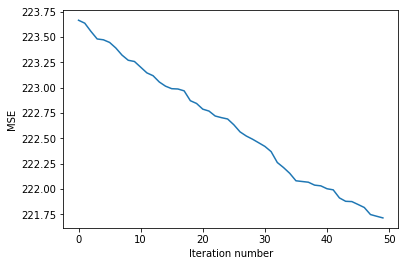

In [73]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

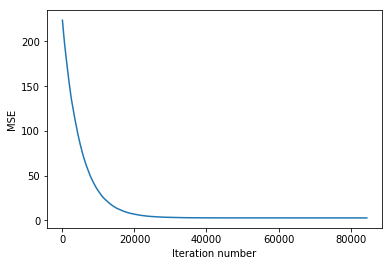

In [74]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [75]:
stoch_grad_desc_weights

array([[ 1.40190566e+01],
       [ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [76]:
stoch_errors_by_iter[-1]

2.784412588406704

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [77]:
answer4 = mserror(y, X2.dot(stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.784412588406704


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**